In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyodbc
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.pyplot import stem
plt.style.use('fivethirtyeight')

In [2]:
server = 'dyplom.wwsi.edu.pl, 50222' 
database = 'INZ2021WypadkiPogodaSH' 
username = 'shan' 
password = 'zaq1@WSX' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = """
        select DataZdarzenia,WypadekKolizja,RodzajZdarzenia,Miejscowosc,Powiat,
        Obszar,CharakterystykaMiejscaZdarzenia,NawierzchniaDrogi,StanNawierzchni,
        SygnalizacjaSwietlna,OznakowaniePoziome,Wina,LiczbaRannychWZdarzeniu,LiczbaZabitychWZdarzeniu,Rok,W.Nazwa
            from Cewik as C join Wojewodztwa as W
        on C.WojewodztwoID=W.IDWojewodztwa

        """

df = pd.read_sql(cursor, con = cnxn)
df2=pd.DataFrame(df)

In [3]:
server = 'dyplom.wwsi.edu.pl, 50222' 
database = 'INZ2021WypadkiPogodaSH' 
username = 'shan' 
password = 'zaq1@WSX' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = """
         Select DataSynop,Widzialnosc,WielkoscZachmurzenia,PredkoscWiatru,TemperaturaPowietrza,TemperaturaPunktuRosy,
        CisnienieNaPoziomieStacji,CisnienieNaPoziomieMorza,
        St.Powiat,Godz,St.Wojewodztwo
            from Synop as Syn join Stacje as St 
        on Syn.IDStacji=St.IDStacji


         """

df3 = pd.read_sql(cursor, con = cnxn)
df4=pd.DataFrame(df3)

## Statystyka Synop

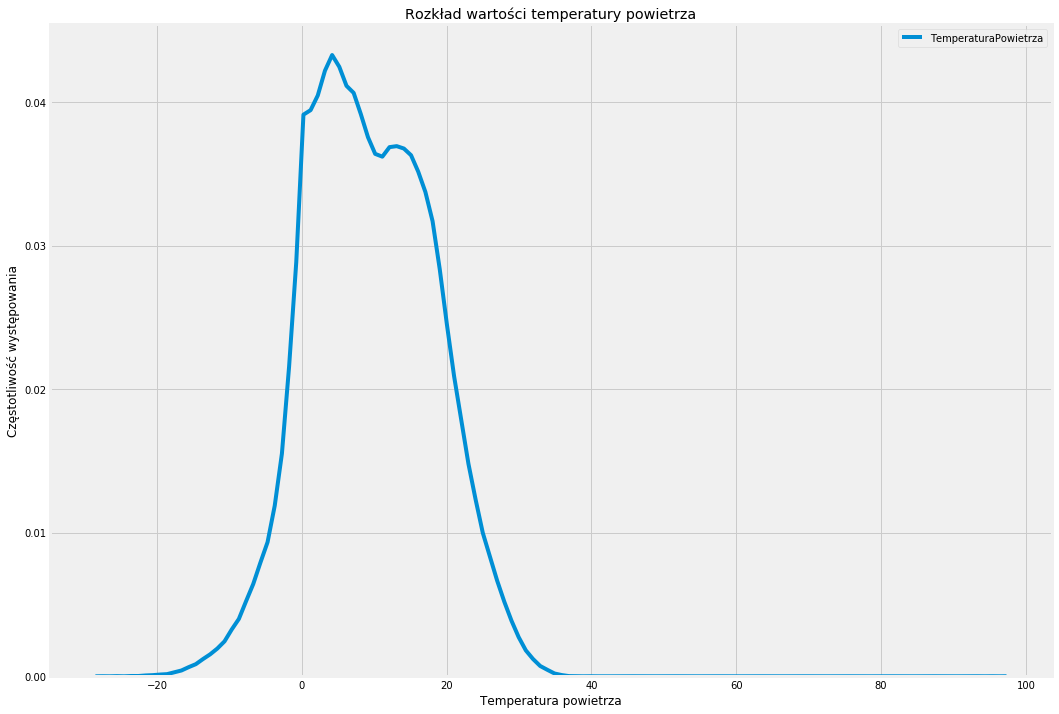

In [30]:
fig, ax = plt.subplots(1,1,figsize=(16, 12))
sns.kdeplot(df4['TemperaturaPowietrza'])
ax.set_xlabel("Temperatura powietrza")
ax.set_ylabel("Częstotliwość występowania")
plt.title("Rozkład wartości temperatury powietrza")
plt.show()

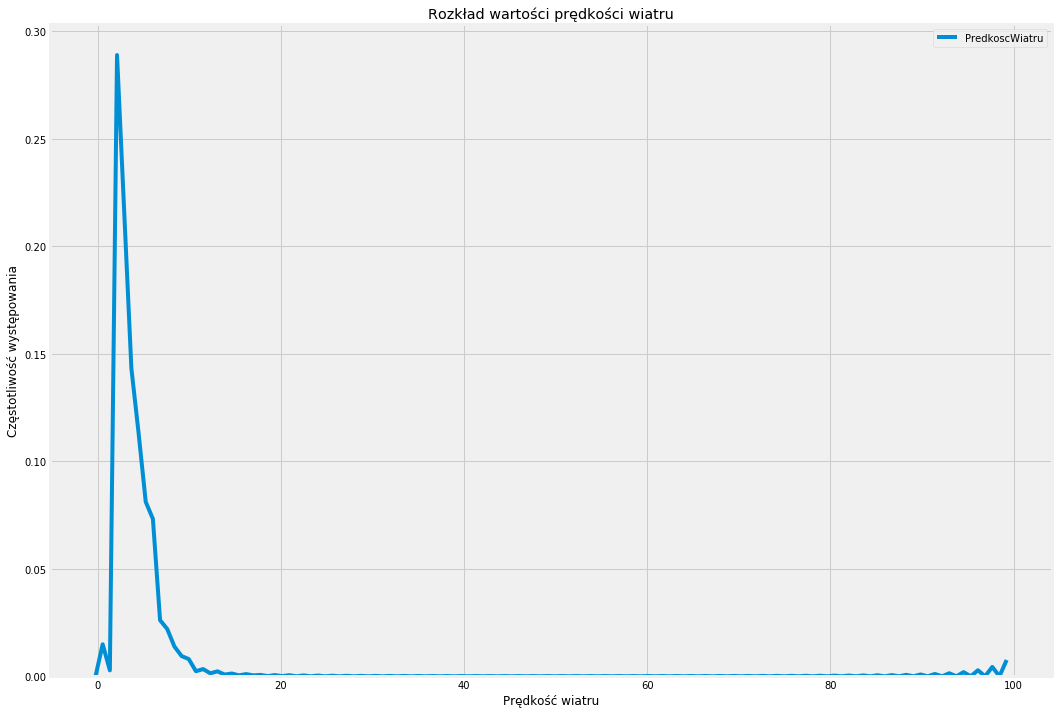

In [27]:
fig, ax = plt.subplots(1,1,figsize=(16, 12))
sns.kdeplot(df4['PredkoscWiatru'])
ax.set_xlabel("Prędkość wiatru")
ax.set_ylabel("Częstotliwość występowania")
plt.title("Rozkład wartości prędkości wiatru")
plt.show()

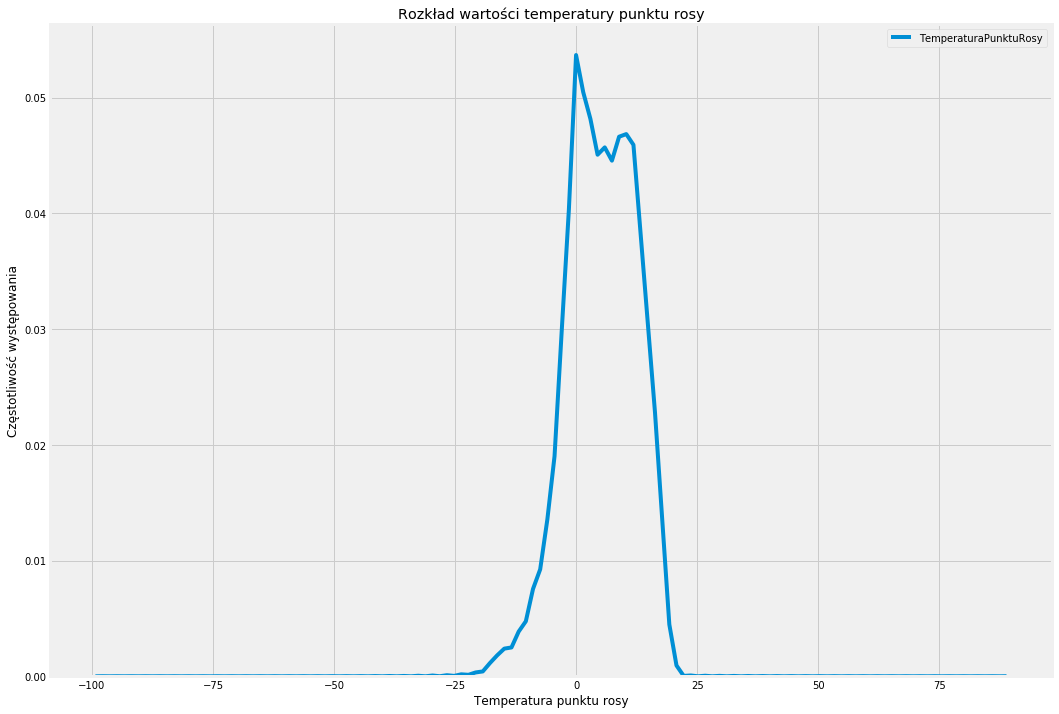

In [33]:
fig, ax = plt.subplots(1,1,figsize=(16, 12))
sns.kdeplot(df4['TemperaturaPunktuRosy'])
ax.set_xlabel("Temperatura punktu rosy")
ax.set_ylabel("Częstotliwość występowania")
plt.title("Rozkład wartości temperatury punktu rosy")
plt.show()

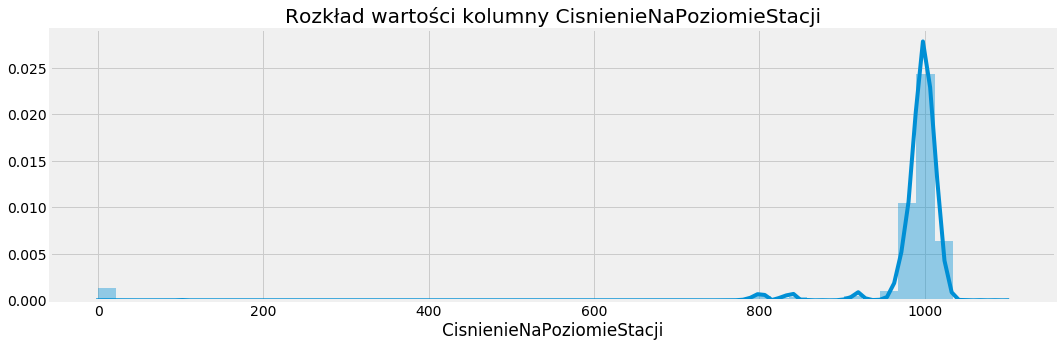

In [12]:
plt.figure(figsize=(18,5))
sns.distplot(df4['CisnienieNaPoziomieStacji'])
plt.title('Rozkład wartości kolumny CisnienieNaPoziomieStacji')
plt.show()

Text(0.5, 1.0, 'Rozkład wartości kolumny CisnienieNaPoziomieMorza')

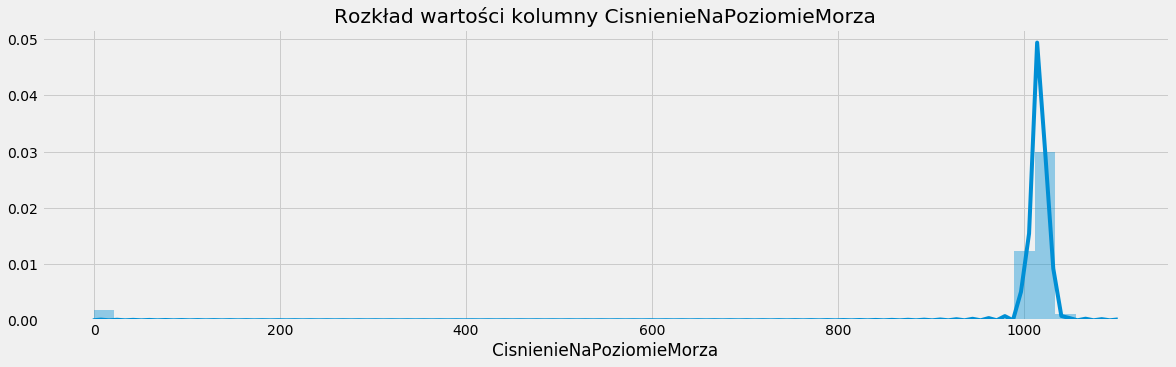

In [13]:
plt.figure(figsize=(18,5))
sns.distplot(df4['CisnienieNaPoziomieMorza'])
plt.title('Rozkład wartości kolumny CisnienieNaPoziomieMorza')

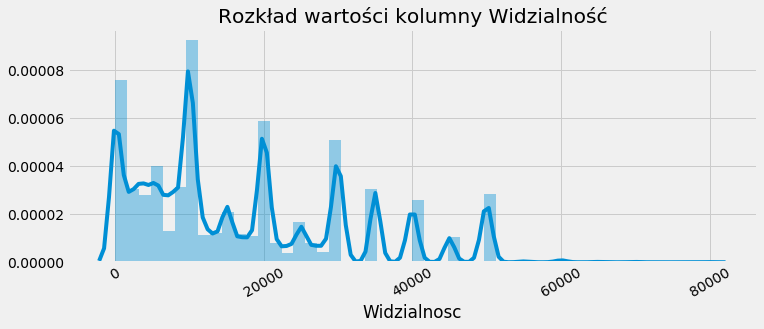

In [14]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.xticks(rotation=30)
sns.distplot(df4['Widzialnosc'])
plt.title('Rozkład wartości kolumny Widzialność')
plt.show()

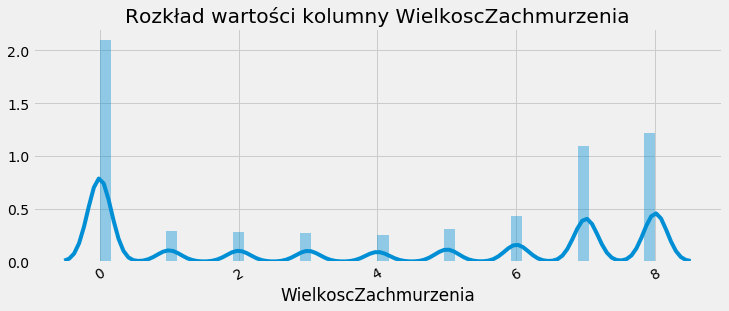

In [15]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.xticks(rotation=30)
sns.distplot(df4['WielkoscZachmurzenia'])
plt.title('Rozkład wartości kolumny WielkoscZachmurzenia')
plt.show()

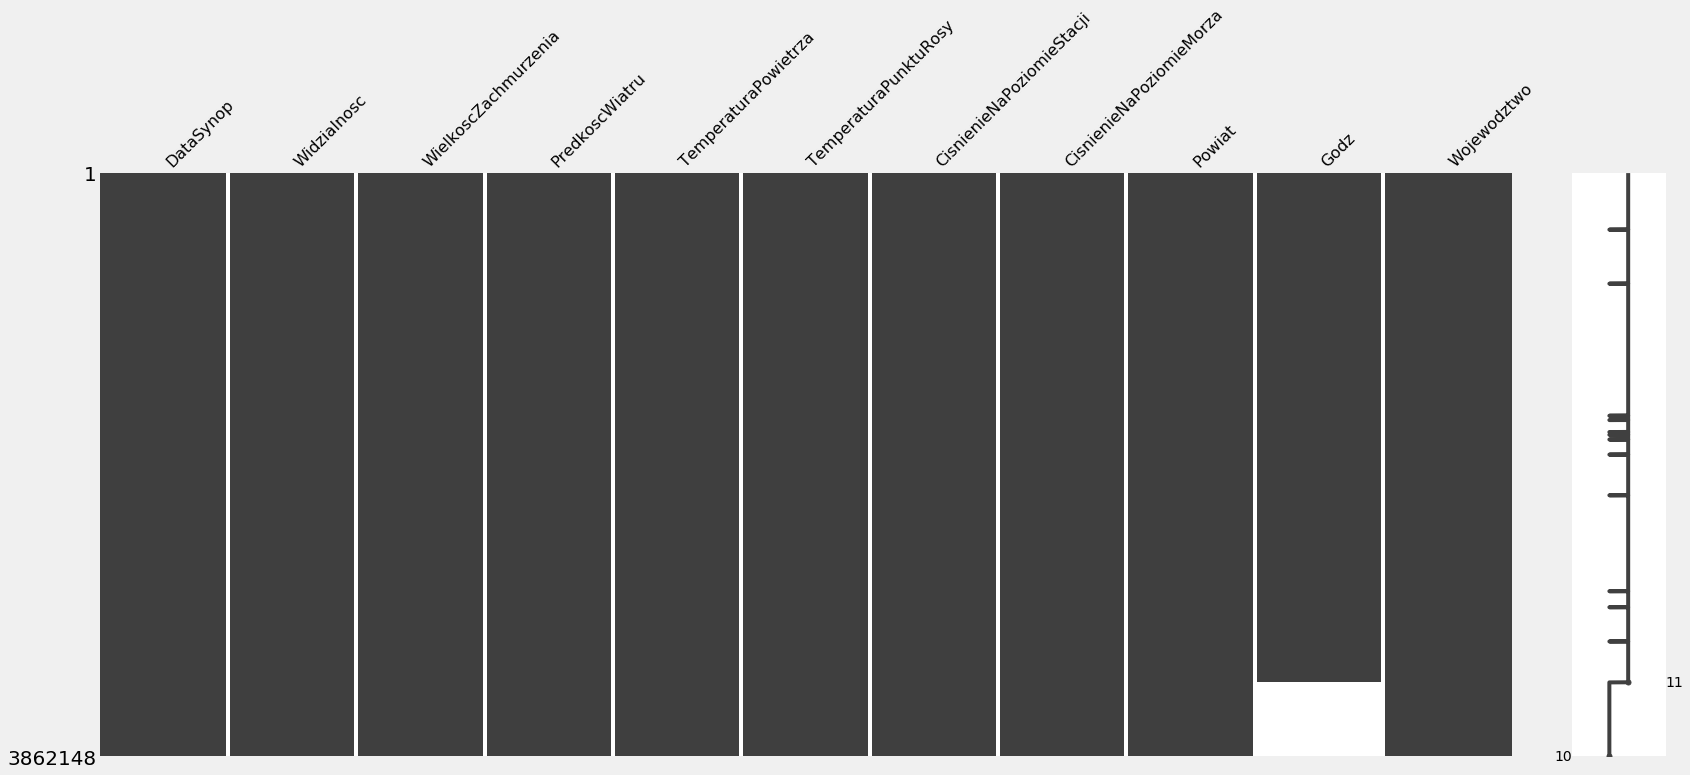

In [16]:
msno.matrix(df4) 

In [22]:
df4.shape

(3862148, 29)

## Statysyka Cewik

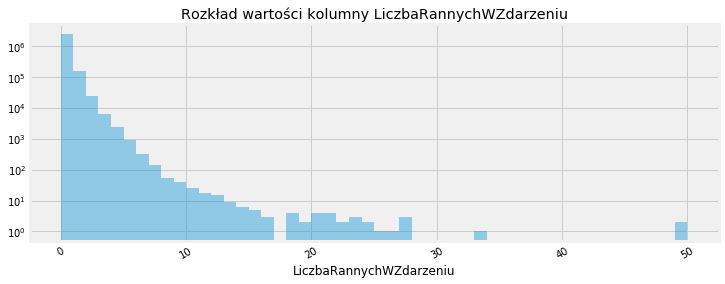

In [8]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.xticks(rotation=30)
sns.distplot(df2['LiczbaRannychWZdarzeniu'], kde=False)
plt.title('Rozkład wartości kolumny LiczbaRannychWZdarzeniu')
plt.yscale('log')
plt.show()

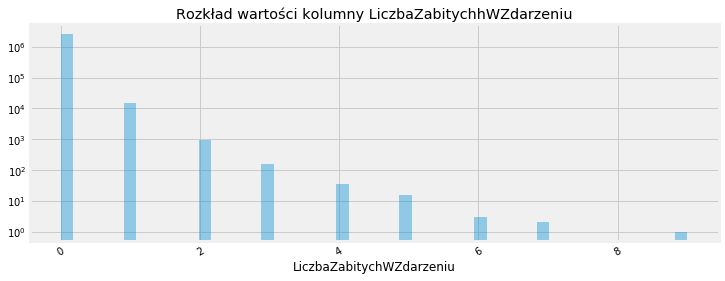

In [9]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.xticks(rotation=30)
sns.distplot(df2['LiczbaZabitychWZdarzeniu'], kde=False)
plt.title('Rozkład wartości kolumny LiczbaZabitychhWZdarzeniu')
plt.yscale('log')
plt.show()

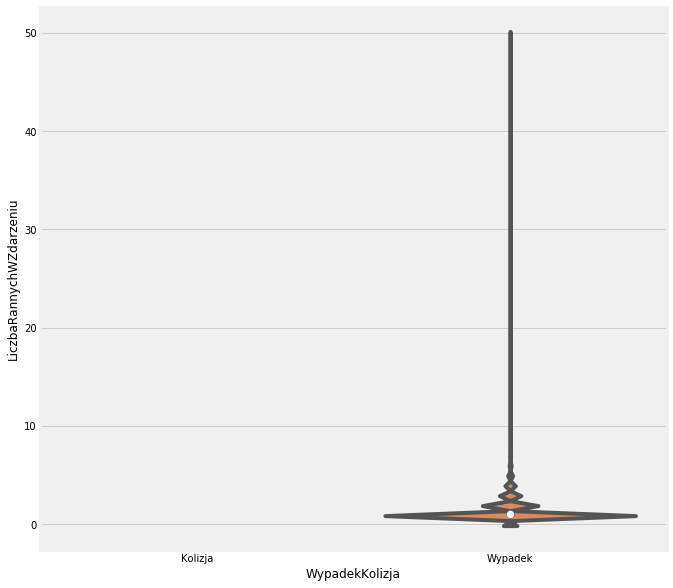

In [20]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="WypadekKolizja", y="LiczbaRannychWZdarzeniu",
                    data=df2, palette="muted",split=True, scale="count")

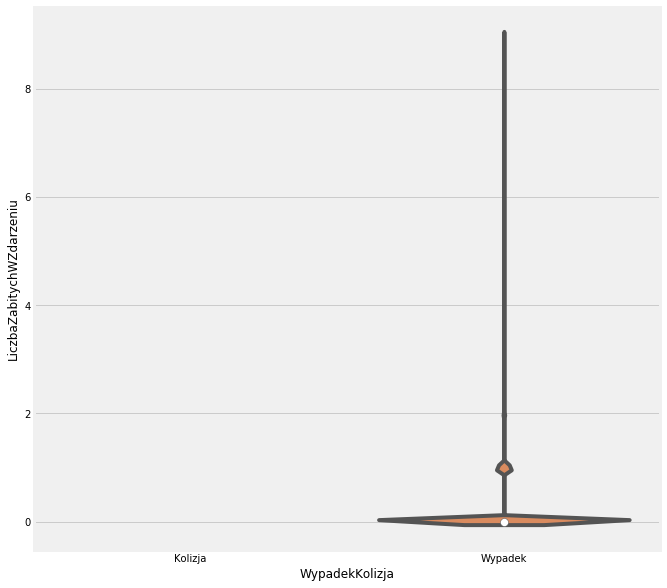

In [21]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(x="WypadekKolizja", y="LiczbaZabitychWZdarzeniu",
                    data=df2, palette="muted",split=True, scale="count")

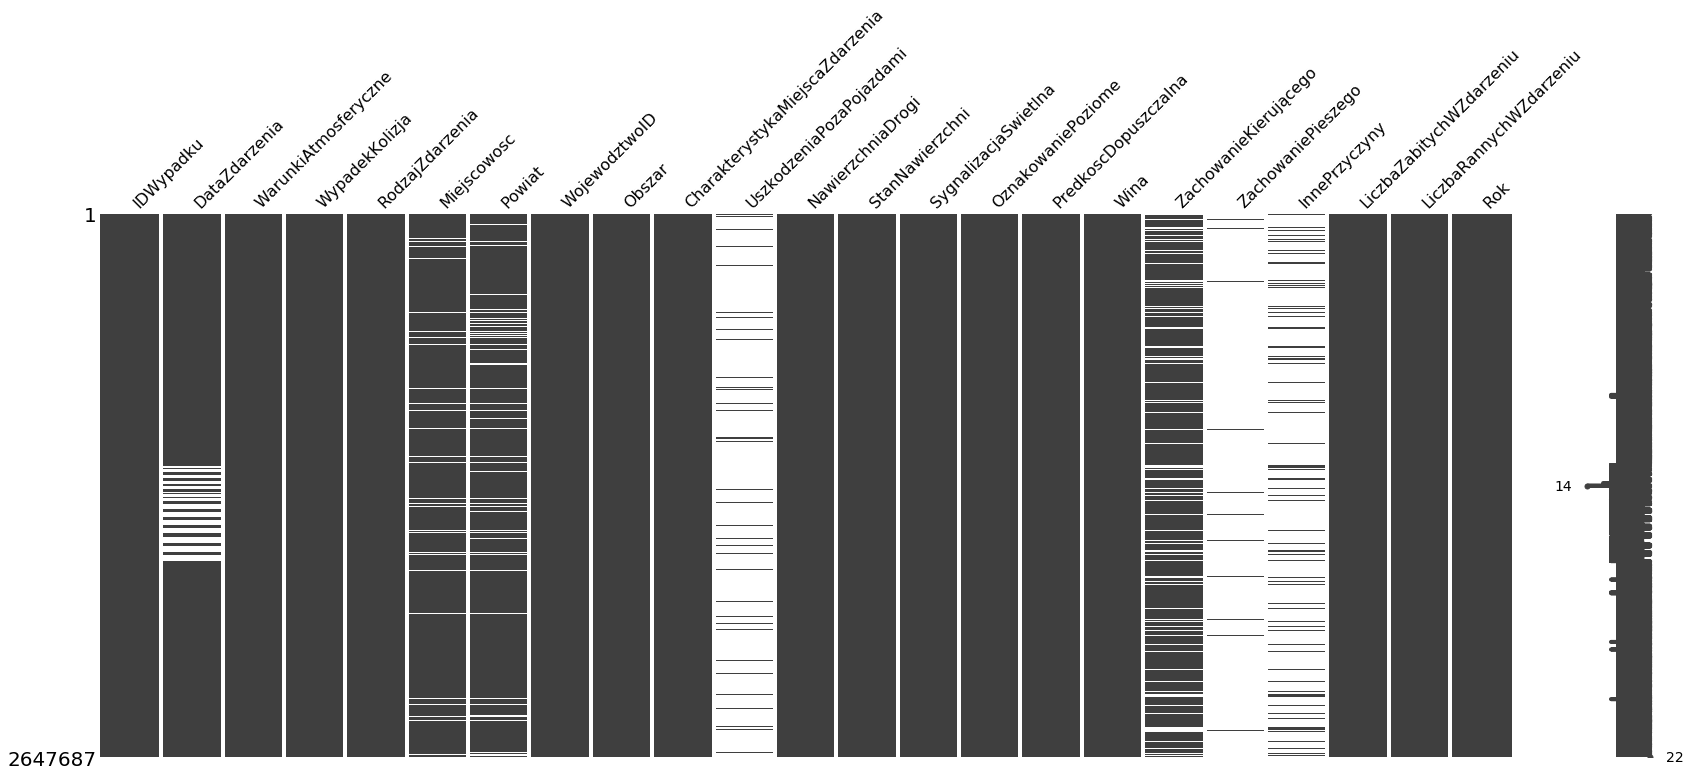

In [12]:
msno.matrix(df2) 

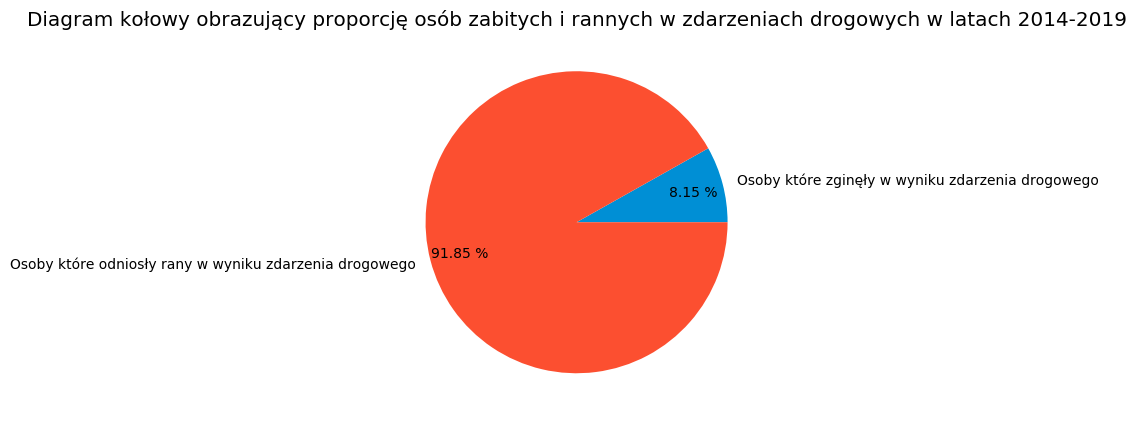

In [14]:
plt.figure(figsize=(8,5),dpi=100)

zabity=df2.loc[df2["LiczbaZabitychWZdarzeniu"]!=0].count()[0]
ranny=df2.loc[df2["LiczbaRannychWZdarzeniu"]!=0].count()[0]


wagi=[zabity,ranny]
label=['Osoby które zginęły w wyniku zdarzenia drogowego','Osoby które odniosły rany w wyniku zdarzenia drogowego']

explode=(0,0)
plt.title("Diagram kołowy obrazujący proporcję osób zabitych i rannych w zdarzeniach drogowych w latach 2014-2019")

plt.pie(wagi,labels=label,explode=explode,pctdistance=0.8,autopct='%.2f %%')
plt.show()


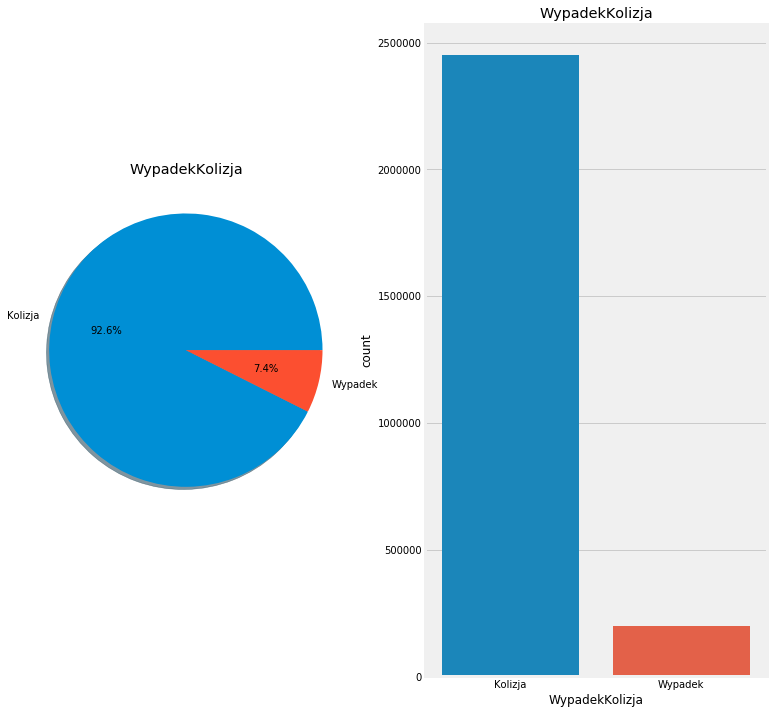

In [19]:
f,ax=plt.subplots(1,2,figsize=(12,12))
df2['WypadekKolizja'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('WypadekKolizja')
ax[0].set_ylabel('')
sns.countplot('WypadekKolizja',data=df2,ax=ax[1])
ax[1].set_title('WypadekKolizja')
plt.show()

In [32]:
df2.shape

(2647688, 23)

# Proces czyszczenia danych

In [61]:
# Usunięcie z kolumny 'Obszar' wartości liczbowej 7

df2.drop(df2[ df2['Obszar'] == '7' ].index)

IDWypadku       DataZdarzenia         WarunkiAtmosferyczne  \
0               93 2014-01-01 02:45:00  Dobre warunki atmosferyczne   
1               94 2014-01-01 02:45:00                    Pochmurno   
2               95 2014-01-01 03:00:00                    Pochmurno   
3               96 2014-01-01 03:13:00                    Pochmurno   
4               97 2014-01-01 03:15:00  Dobre warunki atmosferyczne   
...            ...                 ...                          ...   
2647683     645992 2015-09-10 14:51:00  Dobre warunki atmosferyczne   
2647684     645993 2015-09-10 14:52:00                Opady deszczu   
2647685     645994 2015-09-10 14:53:00                Opady deszczu   
2647686     645995 2015-09-10 14:53:00                Opady deszczu   
2647687     645996 2015-09-10 15:00:00                Opady deszczu   

        WypadekKolizja            RodzajZdarzenia Miejscowosc       Powiat  \
0              Wypadek  Zderzenie pojazdów boczne       RADOM        Radom   
1              Wypadek     Najechanie na pieszego     WROCŁAW      Wroclaw   
2              Kolizja      Najechanie na zwierzę   DZIAŁDOWO  dzialdowski   
3              Wypadek  Zderzenie pojazdów boczne        ŁÓDŹ         lodz   
4              Kolizja     Wywrócenie się pojazdu        None         None   
...                ...                        ...         ...          ...   
2647683        Kolizja   Zderzenie pojazdów tylne        ŁÓDŹ         Łódź   
2647684        Kolizja   Zderzenie pojazdów tylne      LUBLIN         None   
2647685        Kolizja  Zderzenie pojazdów boczne     WROCŁAW      Wrocław   
2647686        Kolizja   Zderzenie pojazdów tylne    ŚWIDNICA    świdnicki   
2647687        Kolizja  Zderzenie pojazdów boczne   ZAWADZKIE   strzelecki   

         WojewodztwoID                Obszar CharakterystykaMiejscaZdarzenia  \
0                  7.0     Obszar zabudowany                         Jezdnia   
1                  1.0     Obszar zabudowany                         Jezdnia   
2                 14.0     Obszar zabudowany                         Jezdnia   
3                  5.0     Obszar zabudowany                         Jezdnia   
4                  1.0  Obszar niezabudowany                         Jezdnia   
...                ...                   ...                             ...   
2647683            5.0     Obszar zabudowany                         Jezdnia   
2647684            3.0     Obszar zabudowany                         Jezdnia   
2647685            1.0     Obszar zabudowany                         Jezdnia   
2647686            1.0     Obszar zabudowany                         Jezdnia   
2647687            8.0     Obszar zabudowany          Przejście dla pieszych   

         ...                              ZachowanieKierującego  \
0        ...              Nieudzielenie pierwszeństwa przejazdu   
1        ...                                               None   
2        ...                                               None   
3        ...              Nieudzielenie pierwszeństwa przejazdu   
4        ...        Niedostosowanie prędkości do warunków ruchu   
...      ...                                                ...   
2647683  ...          Niezachowanie bezp. odl. między pojazdami   
2647684  ...        Niedostosowanie prędkości do warunków ruchu   
2647685  ...              Nieudzielenie pierwszeństwa przejazdu   
2647686  ...          Niezachowanie bezp. odl. między pojazdami   
2647687  ...  Nieprawidłowe: przejeżdżanie przejścia dla pie...   

                                    ZachowaniePieszego  \
0                                                 None   
1        "Przekraczanie jezdni w miejscu niedozwolonym   
2                                                 None   
3                                                 None   
4                                                 None   
...                                                ...   
2647683                                        

## IMPLEMENTACJA MODELU ANALIZY

In [4]:
# Cewik
df2['Rok']= df2['DataZdarzenia'].dt.year
df2['Miesiac'] = df2['DataZdarzenia'].dt.month
df2['Dzien']=df2['DataZdarzenia'].dt.day
df2['Godzina']=df2['DataZdarzenia'].dt.hour
df2['Minuta']=df2['DataZdarzenia'].dt.minute

In [5]:
# Synop
df4['DataSynop'] = pd.to_datetime(df4['DataSynop'])


df4['Rok']= df4['DataSynop'].dt.year
df4['Miesiac'] = df4['DataSynop'].dt.month
df4['Dzien']=df4['DataSynop'].dt.day


In [ ]:
# Zmiana kolumn Synop float64, int64 na float16, int16
cols2 = df4.select_dtypes(include=[np.float64]).columns
df4[cols2] = df4[cols2].astype(np.float16)

cols3 = df4.select_dtypes(include=[np.int64]).columns
df4[cols3] = df4[cols3].astype(np.int16)

In [6]:
# ### wyciagam dane z tym samym rokiem
cewik2014=df2.loc[df2['Rok']==2014]
synop2014=df4.loc[df4['Rok']==2014]

In [7]:
cewik2015=df2.loc[df2['Rok']==2015]
synop2015=df4.loc[df4['Rok']==2015]

In [8]:
cewik2016=df2.loc[df2['Rok']==2016]
synop2016=df4.loc[df4['Rok']==2016]

In [9]:
cewik2017=df2.loc[df2['Rok']==2017]
synop2017=df4.loc[df4['Rok']==2017]

In [10]:
cewik2018=df2.loc[df2['Rok']==2018]
synop2018=df4.loc[df4['Rok']==2018]

In [11]:
cewik2019=df2.loc[df2['Rok']==2019]
synop2019=df4.loc[df4['Rok']==2019]

In [12]:
# Zamiana nazwy kolmny z Godz na Godzina
synop2014.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
0      2014-01-01            0                     0               2   
1      2014-01-01         3000                     8               5   
2      2014-01-01         4000                     4               6   
3      2014-01-01         4000                     8               5   
4      2014-01-01         3000                     8               5   
...           ...          ...                   ...             ...   
643617 2014-12-31         1500                     8               4   
643618 2014-12-31         6000                     8               4   
643619 2014-12-31         6000                     8               2   
643620 2014-12-31         4000                     8               4   
643621 2014-12-31          700                     8               2   

        TemperaturaPowietrza  TemperaturaPunktuRosy  \
0                       -0.2                   -0.8   
1                        0.5                    0.1   
2                        0.4                    0.0   
3                        0.3                   -0.1   
4                       -0.2                   -0.9   
...                      ...                    ...   
643617                  -2.0                   -2.1   
643618                  -1.1                   -2.8   
643619                  -2.2                   -4.1   
643620                  -3.5                   -4.9   
643621                   1.2                    1.2   

        CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza       Powiat  \
0                          1017.6                    1017.7  kolobrzeski   
1                          1014.2                    1018.5     Koszalin   
2                          1017.1                    1018.6      slupski   
3                          1019.1                    1019.5     leborski   
4                             0.0                    1018.6   slawienski   
...                           ...                       ...          ...   
643617                        0.0                    1030.4  tomaszowski   
643618                        0.0                    1030.5        Radom   
643619                        0.0                    1028.8        rycki   
643620                      989.3                    1035.1      klodzki   
643621                     1018.6                    1027.8        Torun   

        Godzina         Wojewodztwo   Rok  Miesiac  Dzien  
0           0.0  zachodniopomorskie  2014        1      1  
1           0.0  zachodniopomorskie  2014        1      1  
2           0.0           pomorskie  2014        1      1  
3           0.0           pomorskie  2014        1      1  
4           0.0  zachodniopomorskie  2014        1      1  
...         ...                 ...   ...      ...    ...  
643617     21.0             lodzkie  2014       12     31  
643618     21.0         mazowieckie  2014       12     31  
643619     21.0           lubelskie  2014       12     31  
643620     21.0        dolnoslaskie  2014       12     31  
643621     22.0  kujawsko-pomorskie  2014       12     31  

[643622 rows x 14 columns]

In [13]:
synop2015.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
643622  2015-01-01            0                     0               4   
643623  2015-01-01        13000                     8               6   
643624  2015-01-01        10000                     8               7   
643625  2015-01-01        12000                     8               7   
643626  2015-01-01            0                     0               5   
...            ...          ...                   ...             ...   
1270030 2015-12-31        50000                     0               5   
1270031 2015-12-31         2100                     0               1   
1270032 2015-12-31         8000                     0               3   
1270033 2015-12-31         9000                     0               2   
1270034 2015-12-31            0                     0               2   

         TemperaturaPowietrza  TemperaturaPunktuRosy  \
643622                    4.8                    3.3   
643623                    4.8                    3.1   
643624                    5.2                    4.5   
643625                    4.9                    4.5   
643626                    4.6                    4.2   
...                       ...                    ...   
1270030                  -7.9                  -33.3   
1270031                  -9.4                  -11.8   
1270032                  -8.8                  -13.5   
1270033                 -12.0                  -13.6   
1270034                 -10.0                  -11.6   

         CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza       Powiat  \
643622                      1027.6                    1028.3  kolobrzeski   
643623                      1023.7                    1028.0     Koszalin   
643624                      1025.1                    1026.6      slupski   
643625                      1025.4                    1025.8     leborski   
643626                      1021.1                    1026.3     leborski   
...                            ...                       ...          ...   
1270030                      799.7                       0.0   tatrzanski   
1270031                      993.4                    1031.8    Nowy Sacz   
1270032                      988.7                    1031.9       Krosno   
1270033                      977.6                    1033.1        leski   
1270034                      995.4                    1032.1     Przemysl   

         Godzina         Wojewodztwo   Rok  Miesiac  Dzien  
643622       1.0  zachodniopomorskie  2015        1      1  
643623       1.0  zachodniopomorskie  2015        1      1  
643624       1.0           pomorskie  2015        1      1  
643625       1.0           pomorskie  2015        1      1  
643626       1.0           pomorskie  2015        1      1  
...          ...                 ...   ...      ...    ...  
1270030     23.0         malopolskie  2015       12     31  
1270031     23.0         malopolskie  2015       12     31  
1270032     23.0        podkarpackie  2015       12     31  
1270033     23.0        podkarpackie  2015       12     31  
1270034     23.0        podkarpackie  2015       12     31  

[626413 rows x 14 columns]

In [14]:
synop2016.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
1270035 2016-01-01            0                     0               3   
1270036 2016-01-01        10000                     6               3   
1270037 2016-01-01        15000                     0               4   
1270038 2016-01-01        20000                     1               5   
1270039 2016-01-01        11000                     0               4   
...            ...          ...                   ...             ...   
1920691 2016-12-31        50000                     1               4   
1920692 2016-12-31         1200                     0               1   
1920693 2016-12-31         9000                     0               5   
1920694 2016-12-31         9000                     0               1   
1920695 2016-12-31            0                     0               6   

         TemperaturaPowietrza  TemperaturaPunktuRosy  \
1270035                  -1.2                   -8.9   
1270036                  -4.5                   -9.7   
1270037                  -4.8                   -9.8   
1270038                  -5.3                   -9.9   
1270039                  -4.5                   -9.6   
...                       ...                    ...   
1920691                  -1.2                  -26.2   
1920692                  -6.5                   -8.2   
1920693                  -4.7                   -8.1   
1920694                  -6.9                   -7.3   
1920695                  -0.6                   -9.0   

         CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza       Powiat  \
1270035                     1025.1                    1025.8  kolobrzeski   
1270036                     1021.8                    1026.3     Koszalin   
1270037                     1024.8                    1026.3      slupski   
1270038                     1026.7                    1027.2     leborski   
1270039                     1025.8                    1026.2   slawienski   
...                            ...                       ...          ...   
1920691                      803.6                       0.0   tatrzanski   
1920692                      990.9                    1028.8    Nowy Sacz   
1920693                      985.9                    1028.3       Krosno   
1920694                      975.2                    1029.4        leski   
1920695                      990.5                    1025.7     Przemysl   

         Godzina         Wojewodztwo   Rok  Miesiac  Dzien  
1270035      0.0  zachodniopomorskie  2016        1      1  
1270036      0.0  zachodniopomorskie  2016        1      1  
1270037      0.0           pomorskie  2016        1      1  
1270038      0.0           pomorskie  2016        1      1  
1270039      0.0  zachodniopomorskie  2016        1      1  
...          ...                 ...   ...      ...    ...  
1920691     23.0         malopolskie  2016       12     31  
1920692     23.0         malopolskie  2016       12     31  
1920693     23.0        podkarpackie  2016       12     31  
1920694     23.0        podkarpackie  2016       12     31  
1920695     23.0        podkarpackie  2016       12     31  

[650661 rows x 14 columns]

In [15]:
synop2017.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
1920696 2017-01-01            0                     0               3   
1920697 2017-01-01         1400                     8               5   
1920698 2017-01-01         1400                     8               7   
1920699 2017-01-01         2500                     8              10   
1920700 2017-01-01          700                     8               6   
...            ...          ...                   ...             ...   
2568466 2017-12-31         8000                     7               5   
2568467 2017-12-31         8000                     7               5   
2568471 2017-12-31         8000                     7               3   
2568472 2017-12-31         6000                     0               3   
2568473 2017-12-31         8000                     0               4   

         TemperaturaPowietrza  TemperaturaPunktuRosy  \
1920696                   2.2                    1.9   
1920697                   1.4                    1.3   
1920698                   2.5                    2.4   
1920699                   3.0                    3.0   
1920700                   1.9                    1.9   
...                       ...                    ...   
2568466                   7.2                    6.8   
2568467                   7.5                    6.8   
2568471                   5.4                    3.9   
2568472                   5.6                    4.2   
2568473                   6.4                    4.9   

         CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza       Powiat  \
1920696                     1018.4                    1019.1  kolobrzeski   
1920697                     1015.1                    1019.4     Koszalin   
1920698                     1016.3                    1017.8      slupski   
1920699                     1016.7                    1017.1     leborski   
1920700                     1018.3                    1018.7   slawienski   
...                            ...                       ...          ...   
2568466                      984.7                    1006.8        Radom   
2568467                      984.6                    1006.7        Radom   
2568471                      993.1                    1007.6        rycki   
2568472                      992.8                    1007.3        rycki   
2568473                      992.6                    1007.0        rycki   

         Godzina         Wojewodztwo   Rok  Miesiac  Dzien  
1920696      0.0  zachodniopomorskie  2017        1      1  
1920697      0.0  zachodniopomorskie  2017        1      1  
1920698      0.0           pomorskie  2017        1      1  
1920699      0.0           pomorskie  2017        1      1  
1920700      0.0  zachodniopomorskie  2017        1      1  
...          ...                 ...   ...      ...    ...  
2568466     22.0         mazowieckie  2017       12     31  
2568467     23.0         mazowieckie  2017       12     31  
2568471     21.0           lubelskie  2017       12     31  
2568472     22.0           lubelskie  2017       12     31  
2568473     23.0           lubelskie  2017       12     31  

[647359 rows x 14 columns]

In [16]:
synop2018.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
2567911 2018-01-01        11000                     8               4   
2567912 2018-01-01         8000                     8               6   
2567913 2018-01-01         1600                     8               6   
2567914 2018-01-01         2500                     8               3   
2567915 2018-01-01        21000                     8               6   
...            ...          ...                   ...             ...   
3208710 2018-12-31        10000                     8               4   
3208711 2018-12-31        10000                     8               4   
3208716 2018-12-31        10000                     8               2   
3208717 2018-12-31        10000                     8               2   
3208718 2018-12-31        10000                     0               2   

         TemperaturaPowietrza  TemperaturaPunktuRosy  \
2567911                   9.6                    8.5   
2567912                   8.3                    8.0   
2567913                   6.5                    6.5   
2567914                   1.4                    1.0   
2567915                  11.1                    7.2   
...                       ...                    ...   
3208710                   1.9                   -0.8   
3208711                   1.5                   -0.9   
3208716                   0.6                   -1.0   
3208717                   0.8                   -0.8   
3208718                   0.8                   -0.7   

         CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza    Powiat  \
2567911                      992.1                     996.2  Koszalin   
2567912                      995.7                     996.1  leborski   
2567913                      976.6                     998.9  elblaski   
2567914                      980.0                    1002.9   Suwalki   
2567915                      995.5                     996.4  Szczecin   
...                            ...                       ...       ...   
3208710                     1005.2                    1028.4     Radom   
3208711                     1004.4                    1027.7     Radom   
3208716                     1013.6                    1028.6     rycki   
3208717                     1013.3                    1028.3     rycki   
3208718                     1012.5                    1027.5     rycki   

         Godzina          Wojewodztwo   Rok  Miesiac  Dzien  
2567911      0.0   zachodniopomorskie  2018        1      1  
2567912      0.0            pomorskie  2018        1      1  
2567913      0.0  warminsko-mazurskie  2018        1      1  
2567914      0.0            podlaskie  2018        1      1  
2567915      0.0   zachodniopomorskie  2018        1      1  
...          ...                  ...   ...      ...    ...  
3208710     22.0          mazowieckie  2018       12     31  
3208711     23.0          mazowieckie  2018       12     31  
3208716     21.0            lubelskie  2018       12     31  
3208717     22.0            lubelskie  2018       12     31  
3208718     23.0            lubelskie  2018       12     31  

[640225 rows x 14 columns]

In [17]:
synop2019.rename(columns={"Godz": "Godzina"})

DataSynop  Widzialnosc  WielkoscZachmurzenia  PredkoscWiatru  \
3208145 2019-01-01        12000                     8               5   
3208146 2019-01-01         2800                     8               4   
3208147 2019-01-01         6000                     8               7   
3208148 2019-01-01         5000                     8              11   
3208149 2019-01-01         4800                     0               6   
...            ...          ...                   ...             ...   
3862143 2019-12-31        10000                     4               6   
3862144 2019-12-31        10000                     4               6   
3862145 2019-12-31        10000                     7               7   
3862146 2019-12-31        20000                     0               7   
3862147 2019-12-31        20000                     0               6   

         TemperaturaPowietrza  TemperaturaPunktuRosy  \
3208145                   6.8                    6.2   
3208146                   6.3                    6.2   
3208147                   6.7                    5.6   
3208148                   5.6                    5.5   
3208149                   5.4                    4.8   
...                       ...                    ...   
3862143                   3.8                    0.5   
3862144                   3.2                    0.6   
3862145                   4.4                    0.5   
3862146                   4.2                    0.0   
3862147                   3.3                   -0.3   

         CisnienieNaPoziomieStacji  CisnienieNaPoziomieMorza       Powiat  \
3208145                     1019.5                    1020.2  kolobrzeski   
3208146                     1015.9                    1020.2     Koszalin   
3208147                     1016.9                    1018.3      slupski   
3208148                     1017.2                    1017.6     leborski   
3208149                     1013.1                    1018.0     leborski   
...                            ...                       ...          ...   
3862143                     1002.7                    1025.7        Radom   
3862144                     1003.5                    1026.6        Radom   
3862145                     1009.0                    1023.7        rycki   
3862146                     1009.9                    1024.6        rycki   
3862147                     1010.8                    1025.6        rycki   

         Godzina         Wojewodztwo   Rok  Miesiac  Dzien  
3208145      0.0  zachodniopomorskie  2019        1      1  
3208146      0.0  zachodniopomorskie  2019        1      1  
3208147      0.0           pomorskie  2019        1      1  
3208148      0.0           pomorskie  2019        1      1  
3208149      0.0           pomorskie  2019        1      1  
...          ...                 ...   ...      ...    ...  
3862143      NaN         mazowieckie  2019       12     31  
3862144      NaN         mazowieckie  2019       12     31  
3862145      NaN           lubelskie  2019       12     31  
3862146      NaN           lubelskie  2019       12     31  
3862147      NaN           lubelskie  2019       12     31  

[653868 rows x 14 columns]

In [18]:
#Zmiana wartości z float64 na int64
synop2014['Godz'] = synop2014['Godz'].astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
synop2015['Godz'] = synop2015['Godz'].astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
synop2016['Godz'] = synop2016['Godz'].astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
synop2017['Godz'] = synop2017['Godz'].astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
synop2018['Godz'] = synop2018['Godz'].astype(np.int64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## ANALIZA W SKALI MIESIĘCZNEJ

## Srednia temperautra powietrza z podziałem na miesiace Wypadek/Kolizja

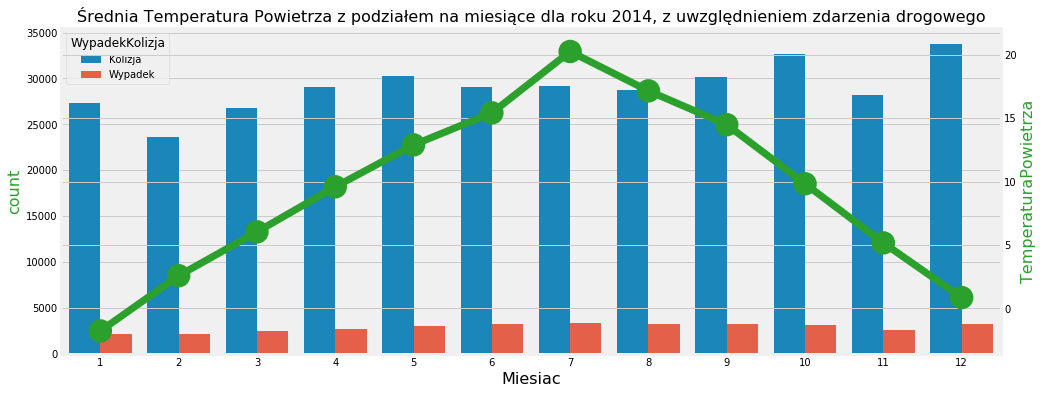

In [44]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [23]:
mTempPowietrzaCewik2014=cewik2014.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2014=synop2014.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2014 = mTempPowietrzaSynop2014.corr(mTempPowietrzaCewik2014)
mTempPowietrza2014

0.27918068859684875

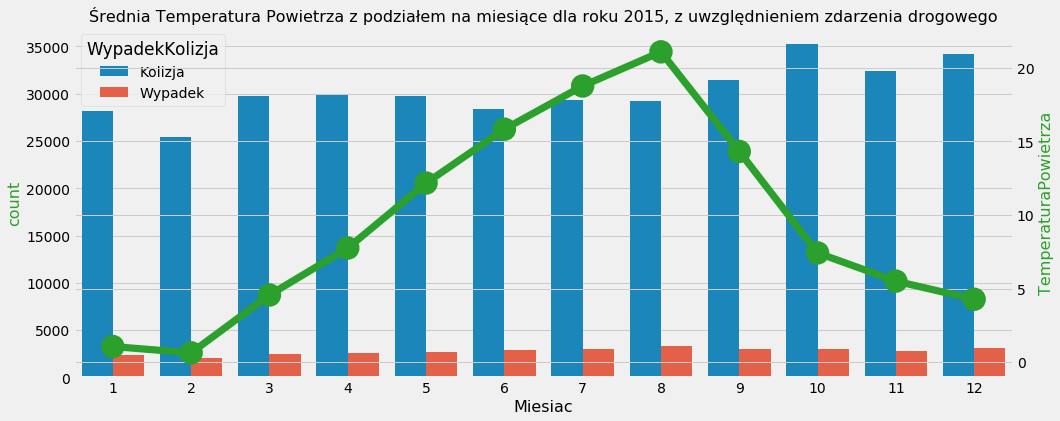

In [52]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [57]:
mTempPowietrzaCewik2015=cewik2015.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2015=synop2015.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2015 = mTempPowietrzaSynop2015.corr(mTempPowietrzaCewik2015)
mTempPowietrza2015

0.07017037372485532

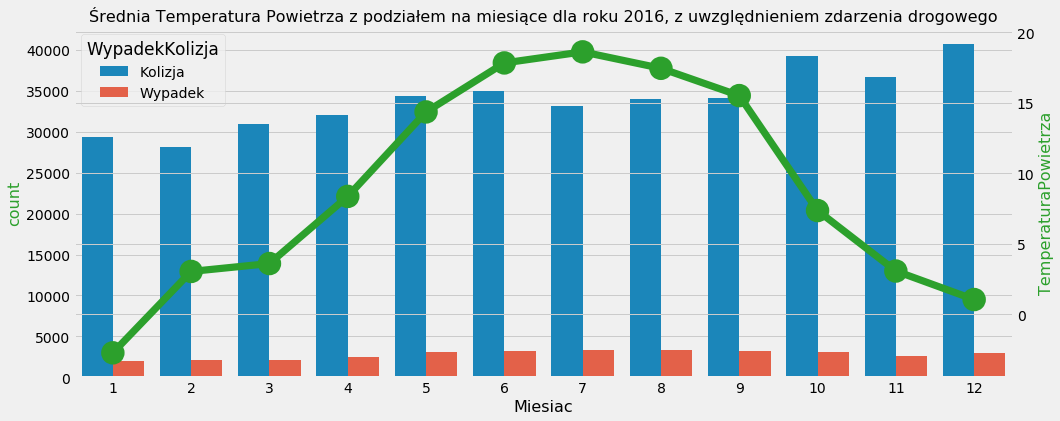

In [53]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [58]:
mTempPowietrzaCewik2016=cewik2016.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2016=synop2016.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2016 = mTempPowietrzaSynop2016.corr(mTempPowietrzaCewik2016)
mTempPowietrza2016

0.20030333690731414

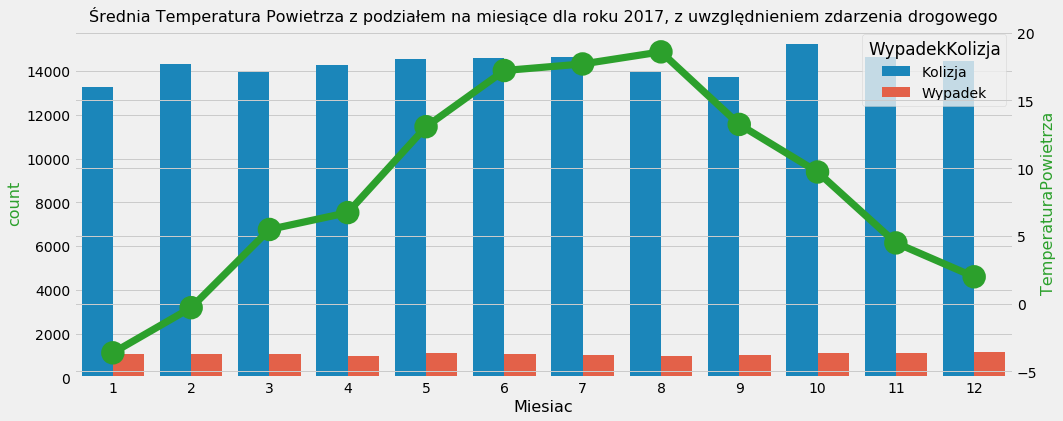

In [54]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [59]:
mTempPowietrzaCewik2017=cewik2017.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2017=synop2017.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2017 = mTempPowietrzaSynop2017.corr(mTempPowietrzaCewik2017)
mTempPowietrza2017

0.2589704115671693

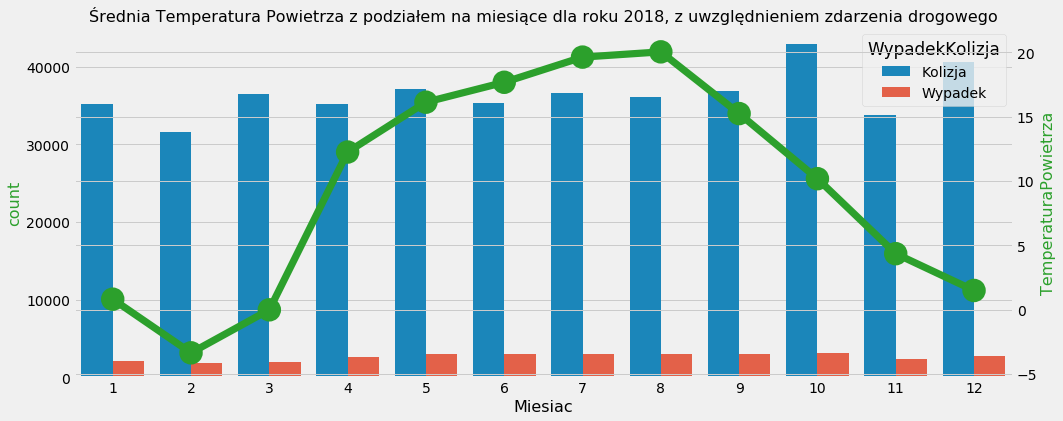

In [55]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [60]:
mTempPowietrzaCewik2018=cewik2018.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2018=synop2018.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2018 = mTempPowietrzaSynop2018.corr(mTempPowietrzaCewik2018)
mTempPowietrza2018

0.293159320589895

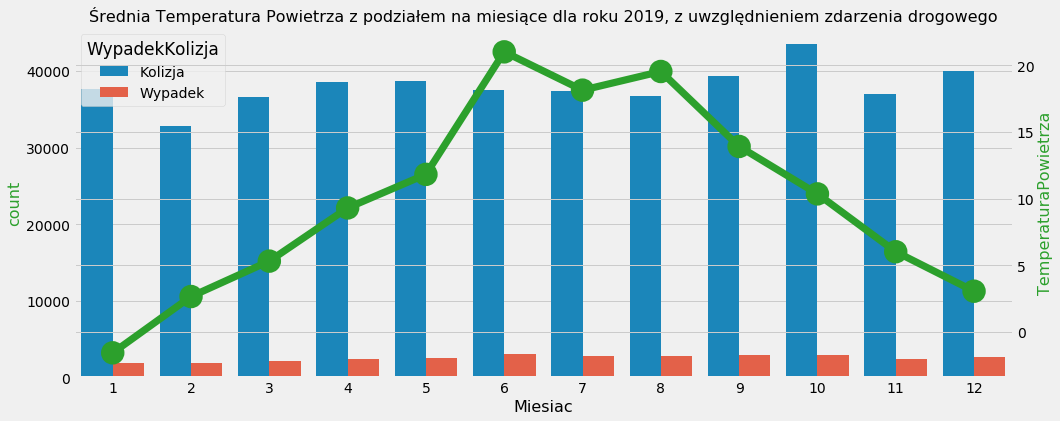

In [56]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura Powietrza z podziałem na miesiące dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='TemperaturaPowietrza', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [61]:
mTempPowietrzaCewik2019=cewik2019.groupby('Miesiac')['WypadekKolizja'].count()
mTempPowietrzaSynop2019=synop2019.groupby('Miesiac')['TemperaturaPowietrza'].mean()
mTempPowietrza2019 = mTempPowietrzaSynop2019.corr(mTempPowietrzaCewik2019)
mTempPowietrza2019

0.22611896992359096

## Srednia Wielkosc zachmurzenia z podziałem na miesiące Wypadek/Kolizja

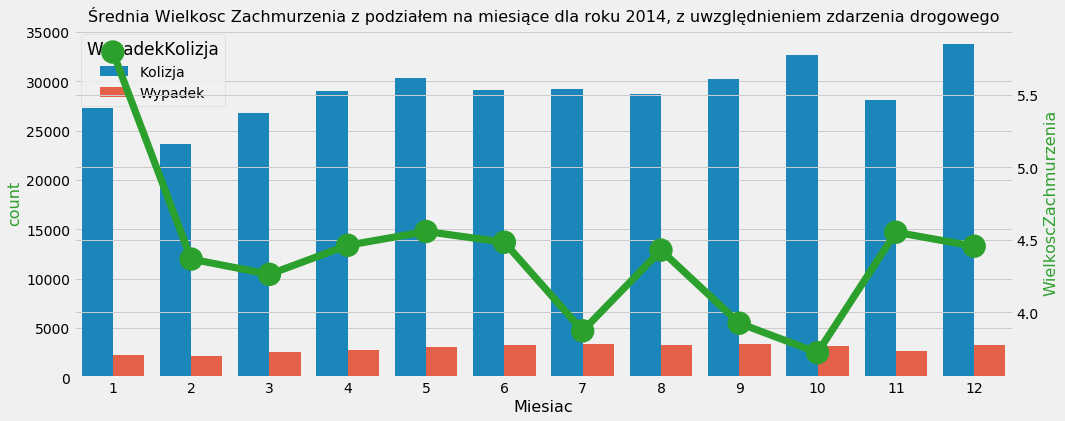

In [57]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [62]:
mZachmurzenieCewik2014=cewik2014.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2014=synop2014.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2014 = mZachmurzenieSynop2014.corr(mZachmurzenieCewik2014)
mZachmurzenie2014

-0.35976906712356355

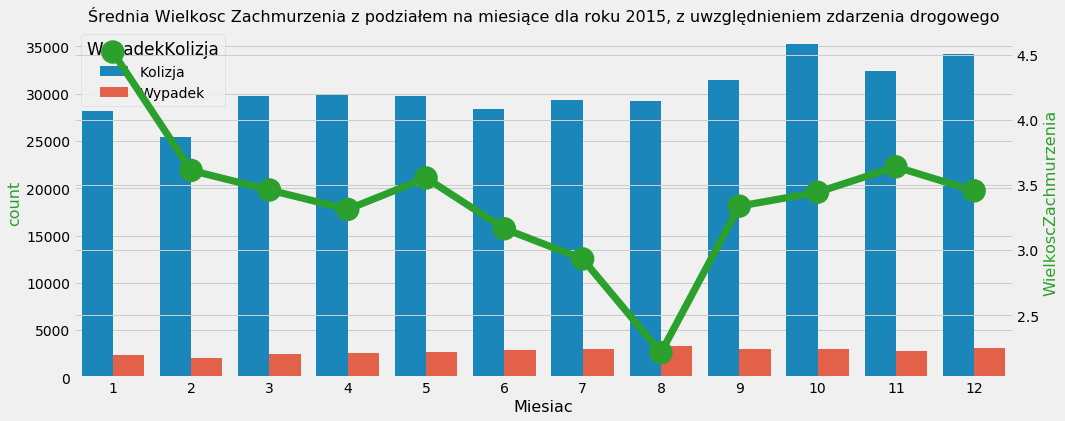

In [58]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [176]:
mZachmurzenieCewik2015=cewik2015.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2015=synop2015.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2015 = mZachmurzenieSynop2015.corr(mZachmurzenieCewik2015)
mZachmurzenie2015

-0.10570501644027759

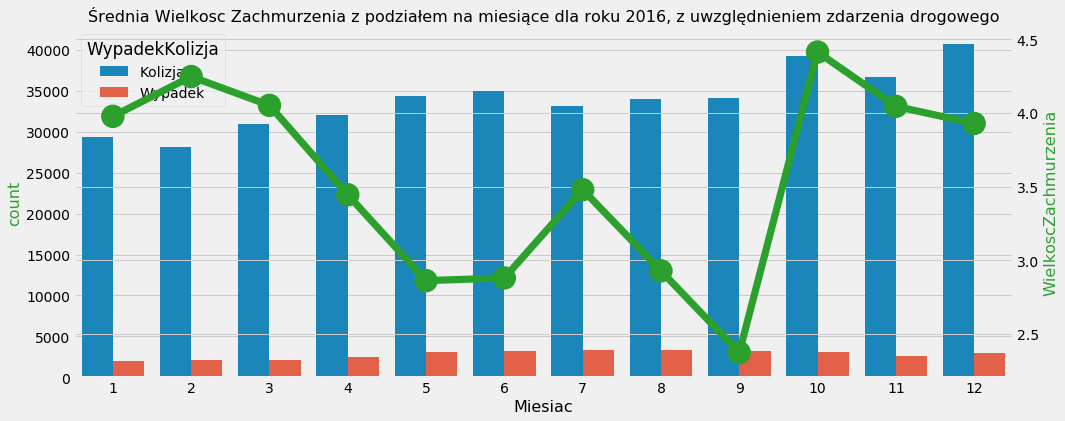

In [59]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [64]:
mZachmurzenieCewik2016=cewik2016.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2016=synop2016.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2016 = mZachmurzenieSynop2016.corr(mZachmurzenieCewik2016)
mZachmurzenie2016

-0.07538205293649132

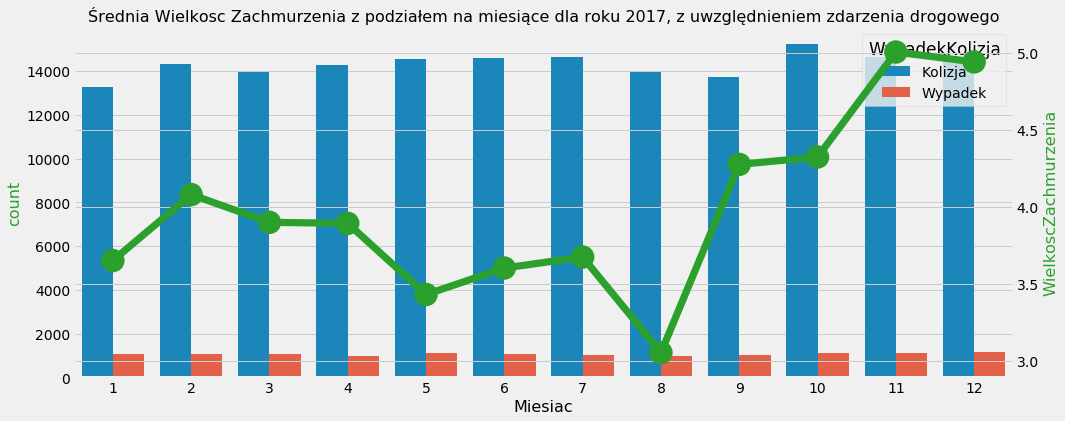

In [60]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [65]:
mZachmurzenieCewik2017=cewik2017.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2017=synop2017.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2017 = mZachmurzenieSynop2017.corr(mZachmurzenieCewik2017)
mZachmurzenie2017

0.4709898078893474

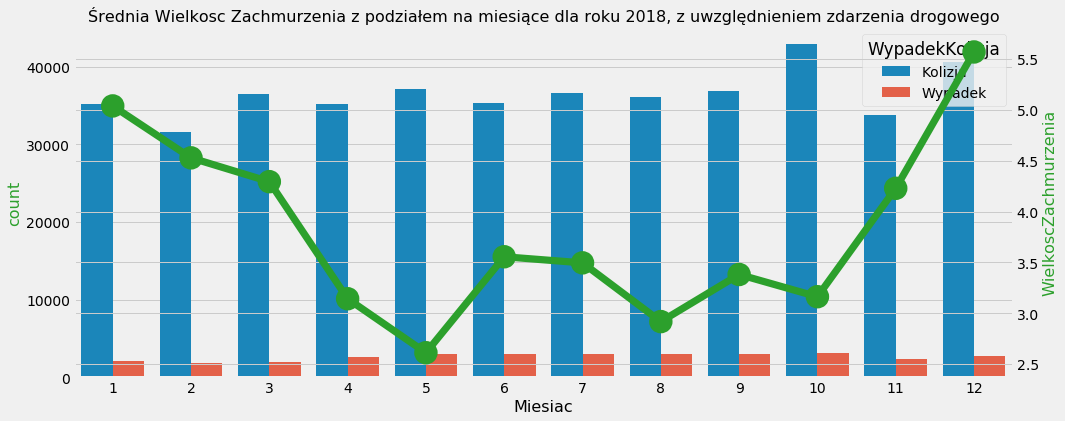

In [61]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [177]:
mZachmurzenieCewik2018=cewik2018.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2018=synop2018.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2018 = mZachmurzenieSynop2018.corr(mZachmurzenieCewik2018)
mZachmurzenie2018

-0.18149280234379359

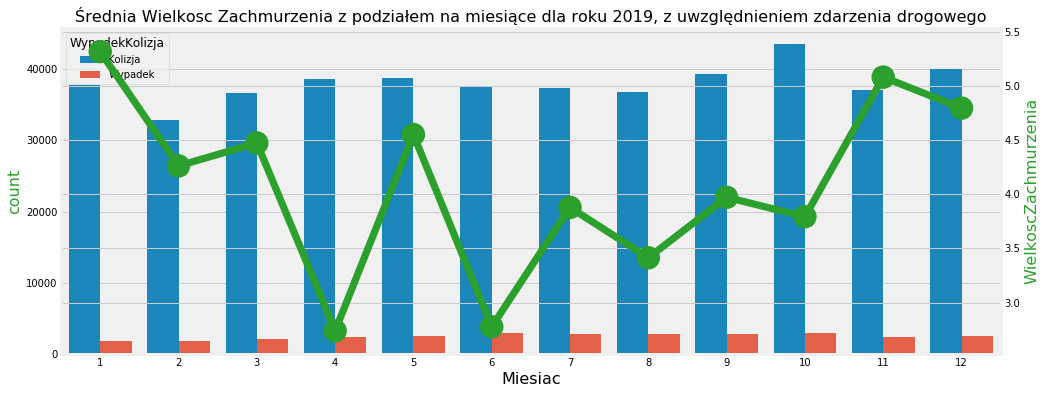

In [178]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Wielkosc Zachmurzenia z podziałem na miesiące dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='WielkoscZachmurzenia', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [179]:
mZachmurzenieCewik2019=cewik2019.groupby('Miesiac')['WypadekKolizja'].count()
mZachmurzenieSynop2019=synop2019.groupby('Miesiac')['WielkoscZachmurzenia'].mean()
mZachmurzenie2019 = mZachmurzenieSynop2019.corr(mZachmurzenieCewik2019)
mZachmurzenie2019

-0.1575192155292472

## Srednia prędkość wiatru z podziałem na Miesiące Wypadek/Kolizja

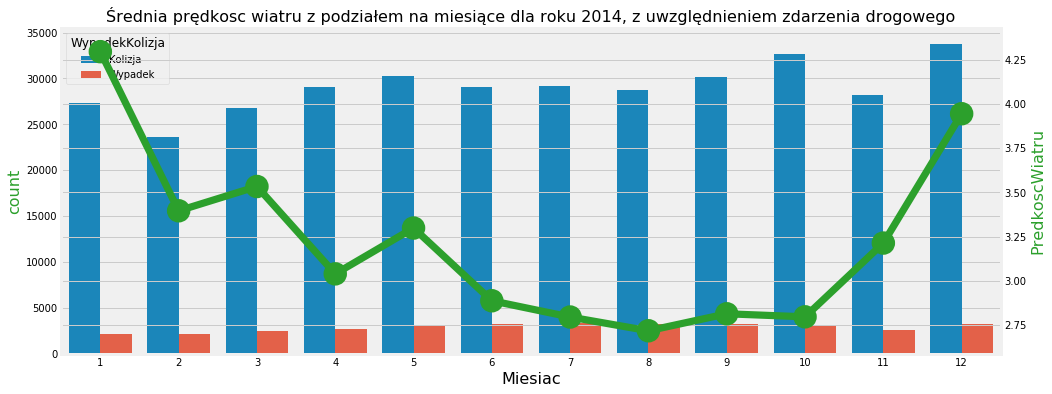

In [58]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [69]:
mPredkoscWiatruCewik2014=cewik2014.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2014=synop2014.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2014 = mPredkoscWiatruSynop2014.corr(mPredkoscWiatruCewik2014)
mPredkoscWiatru2014

-0.20674156230564997

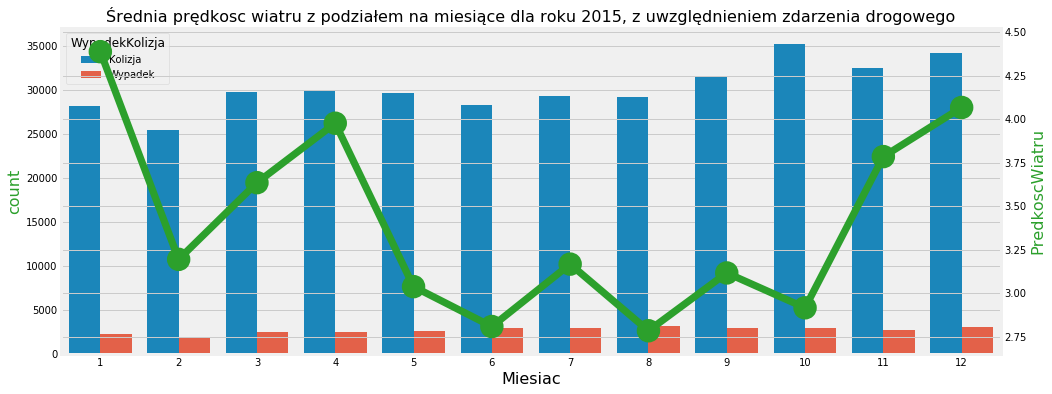

In [59]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [70]:
mPredkoscWiatruCewik2015=cewik2015.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2015=synop2015.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2015 = mPredkoscWiatruSynop2015.corr(mPredkoscWiatruCewik2015)
mPredkoscWiatru2015

0.037138355964970254

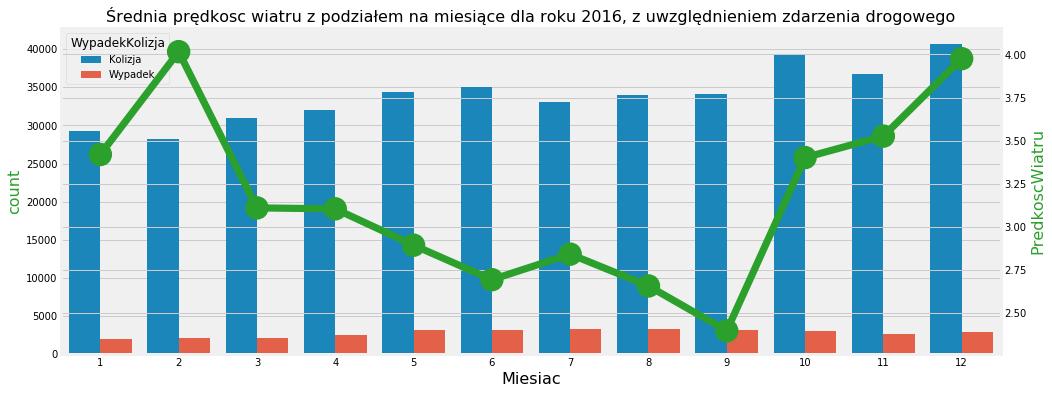

In [60]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [71]:
mPredkoscWiatruCewik2016=cewik2016.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2016=synop2016.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2016 = mPredkoscWiatruSynop2016.corr(mPredkoscWiatruCewik2016)
mPredkoscWiatru2016

-0.009016585347049598

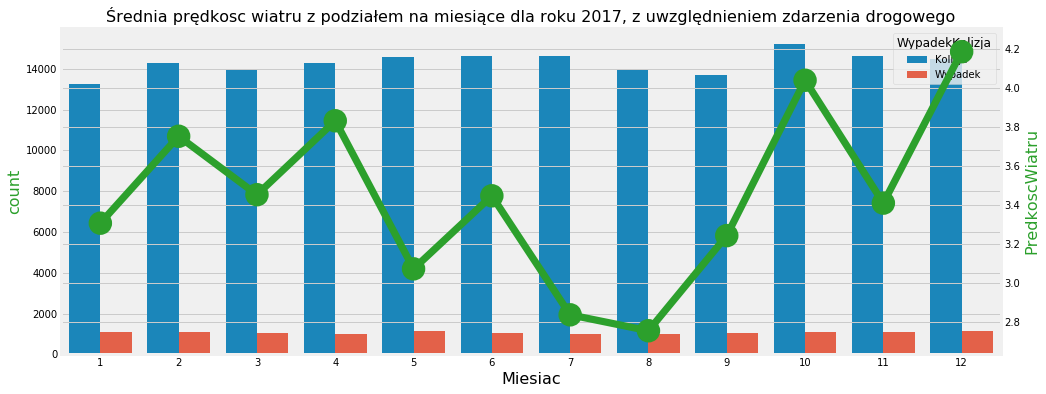

In [61]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [72]:
mPredkoscWiatruCewik2017=cewik2017.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2017=synop2017.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2017 = mPredkoscWiatruSynop2017.corr(mPredkoscWiatruCewik2017)
mPredkoscWiatru2017

0.27404289796712417

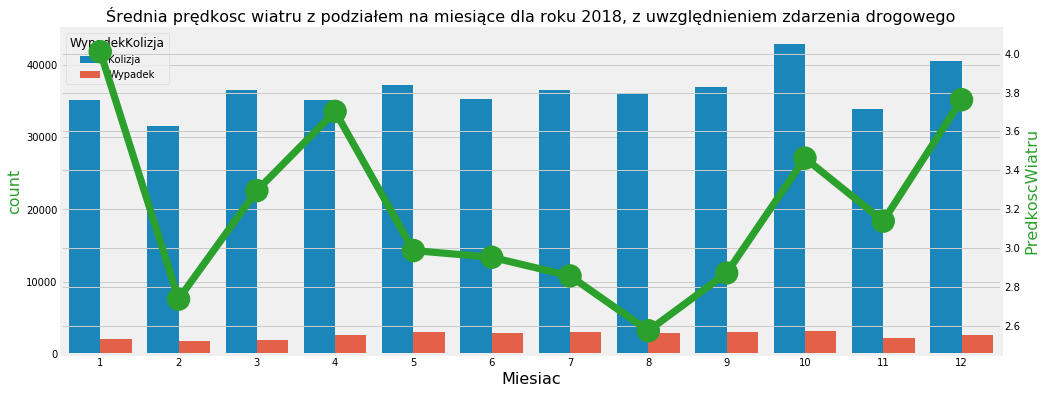

In [62]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [73]:
mPredkoscWiatruCewik2018=cewik2018.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2018=synop2018.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2018 = mPredkoscWiatruSynop2018.corr(mPredkoscWiatruCewik2018)
mPredkoscWiatru2018

0.268013966841686

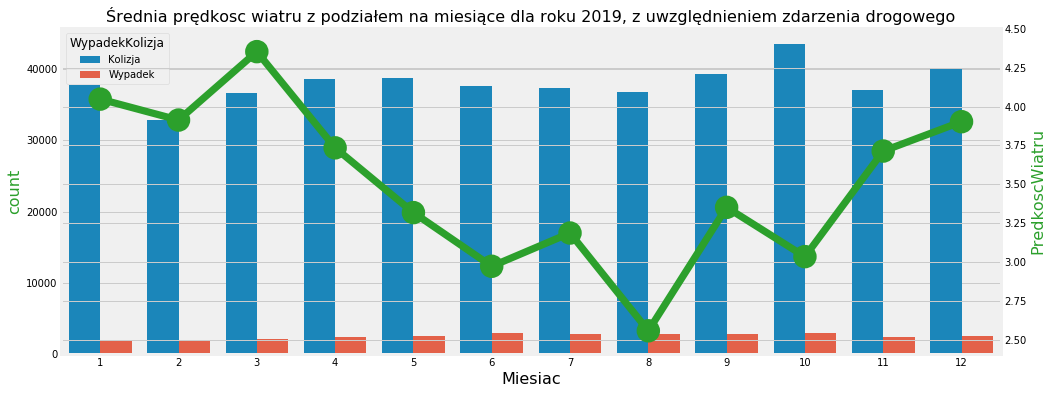

In [63]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkosc wiatru z podziałem na miesiące dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='PredkoscWiatru', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [74]:
mPredkoscWiatruCewik2019=cewik2019.groupby('Miesiac')['WypadekKolizja'].count()
mPredkoscWiatruSynop2019=synop2019.groupby('Miesiac')['PredkoscWiatru'].mean()
mPredkoscWiatru2019 = mPredkoscWiatruSynop2019.corr(mPredkoscWiatruCewik2019)
mPredkoscWiatru2019

-0.3674330130585983

## Srednie cisnienie na poziomie stacji z podziałem na miesiące Wypadek/Kolizja

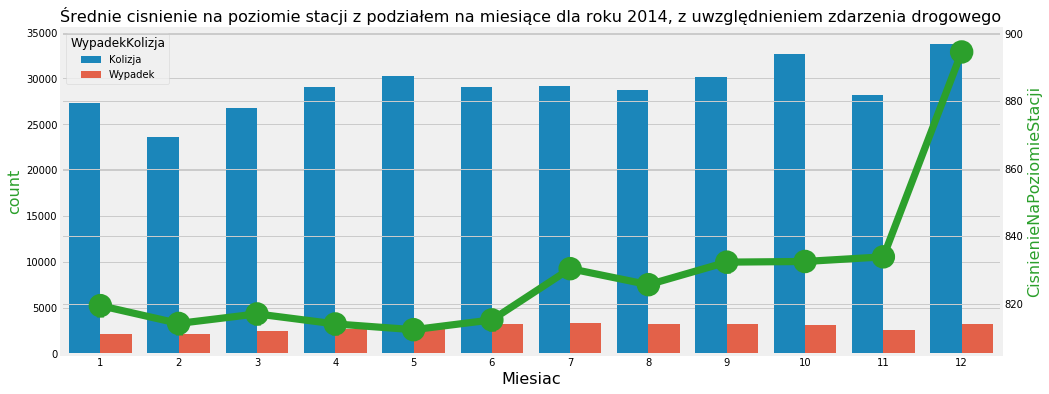

In [64]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [76]:
mCisnienieStacjaCewik2014=cewik2014.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2014=synop2014.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2014 = mCisnienieStacjaSynop2014.corr(mCisnienieStacjaCewik2014)
mCisnienieStacja2014

0.6375063672205423

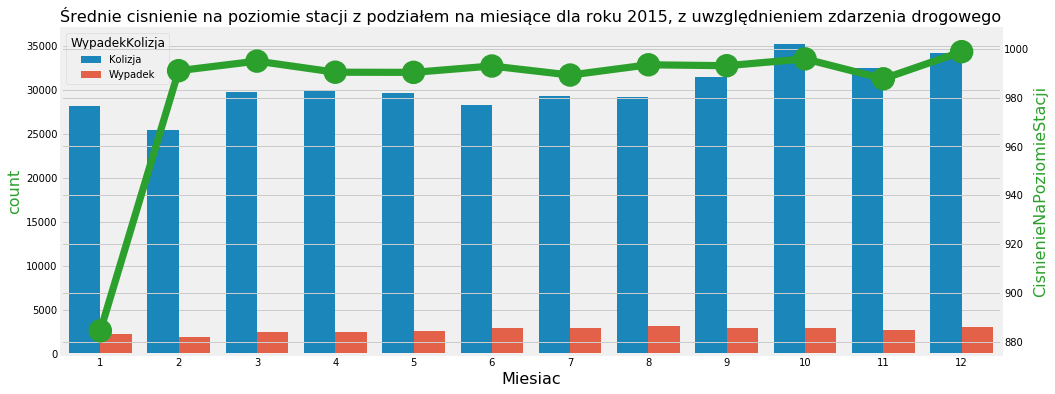

In [65]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [77]:
mCisnienieStacjaCewik2015=cewik2015.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2015=synop2015.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2015 = mCisnienieStacjaSynop2015.corr(mCisnienieStacjaCewik2015)
mCisnienieStacja2015

0.31108662599550024

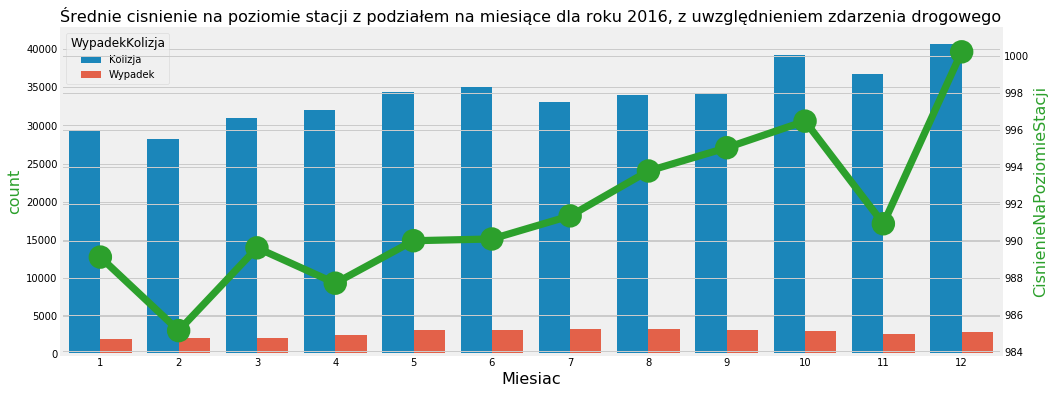

In [66]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [78]:
mCisnienieStacjaCewik2016=cewik2016.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2016=synop2016.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2016 = mCisnienieStacjaSynop2016.corr(mCisnienieStacjaCewik2016)
mCisnienieStacja2016

0.8540190039579971

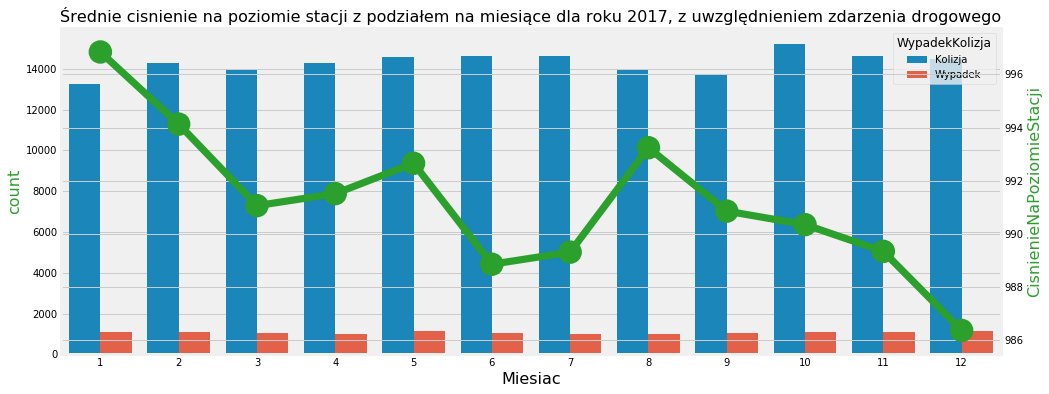

In [67]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [79]:
mCisnienieStacjaCewik2017=cewik2017.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2017=synop2017.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2017 = mCisnienieStacjaSynop2017.corr(mCisnienieStacjaCewik2017)
mCisnienieStacja2017

-0.6055116510755101

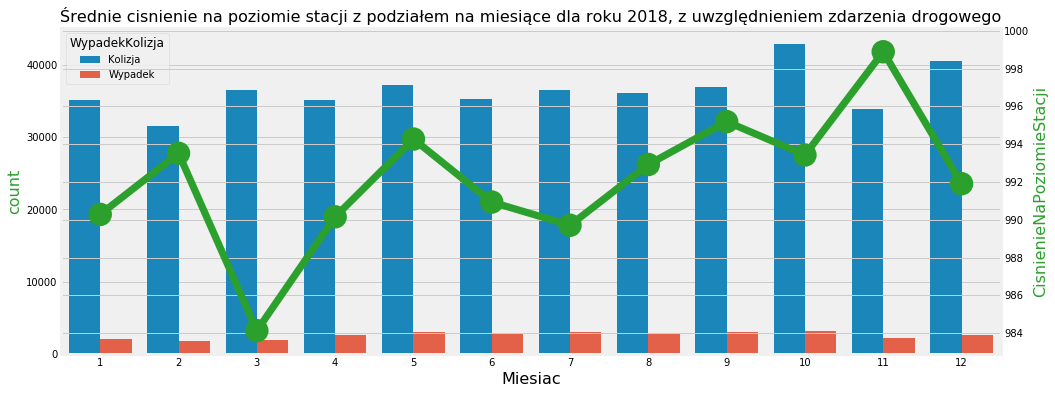

In [68]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [80]:
mCisnienieStacjaCewik2018=cewik2018.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2018=synop2018.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2018 = mCisnienieStacjaSynop2018.corr(mCisnienieStacjaCewik2018)
mCisnienieStacja2018

-0.03465267668710552

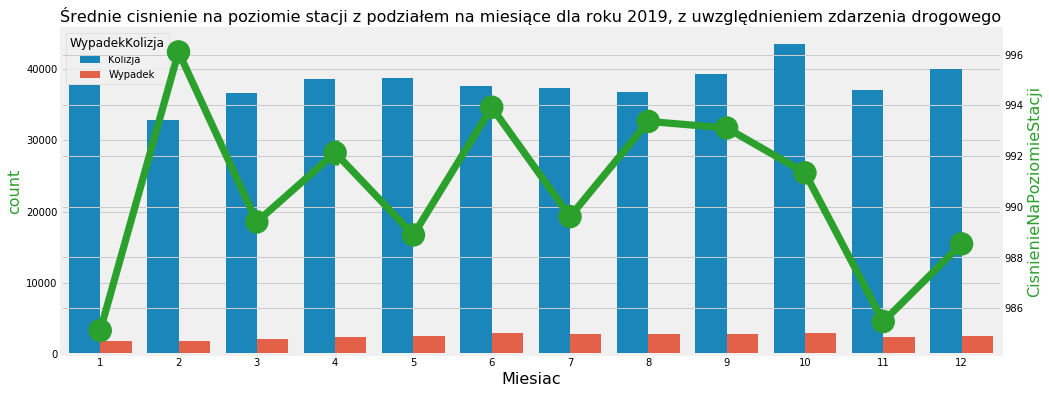

In [69]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie cisnienie na poziomie stacji z podziałem na miesiące dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='CisnienieNaPoziomieStacji', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [81]:
mCisnienieStacjaCewik2019=cewik2019.groupby('Miesiac')['WypadekKolizja'].count()
mCisnienieStacjaSynop2019=synop2019.groupby('Miesiac')['CisnienieNaPoziomieStacji'].mean()
mCisnienieStacja2019 = mCisnienieStacjaSynop2019.corr(mCisnienieStacjaCewik2019)
mCisnienieStacja2019

-0.18027707630713358

## Badanie Godzinowe !!!

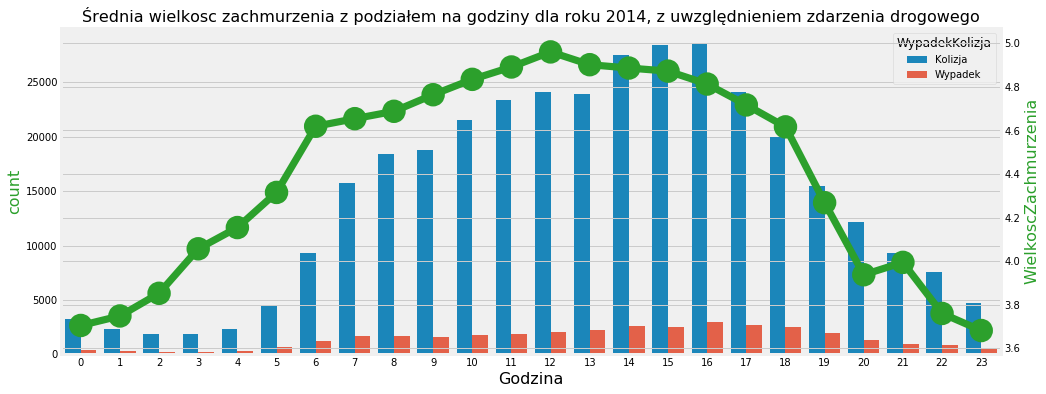

In [105]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [82]:
gZachmurzenieCewik2014=cewik2014.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2014=synop2014.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2014 = gZachmurzenieSynop2014.corr(gZachmurzenieCewik2014)
gZachmurzenie2014

0.8754670993210965

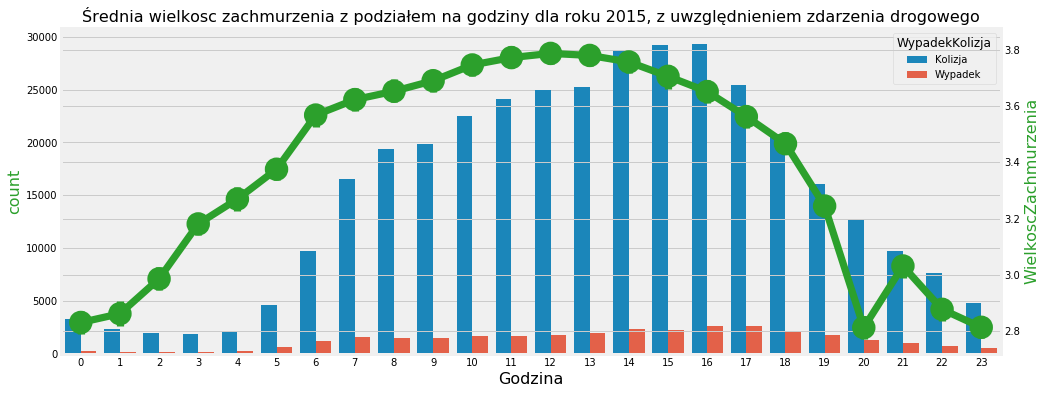

In [106]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [83]:
gZachmurzenieCewik2015=cewik2015.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2015=synop2015.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2015 = gZachmurzenieSynop2015.corr(gZachmurzenieCewik2015)
gZachmurzenie2015

0.808033790797934

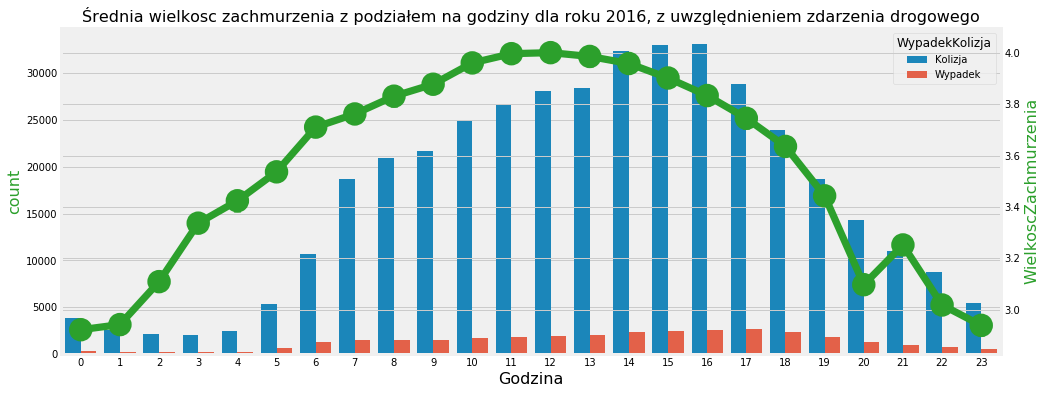

In [107]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [84]:
gZachmurzenieCewik2016=cewik2016.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2016=synop2016.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2016 = gZachmurzenieSynop2016.corr(gZachmurzenieCewik2016)
gZachmurzenie2016

0.828052411391075

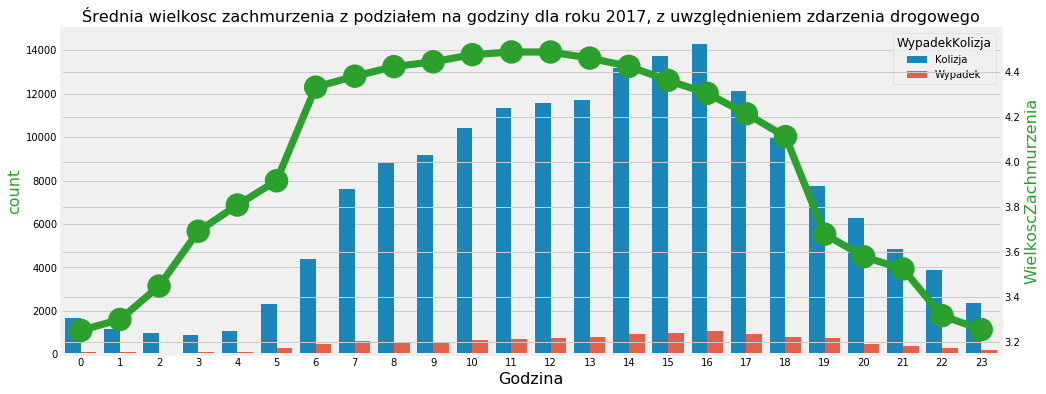

In [108]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [85]:
gZachmurzenieCewik2017=cewik2017.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2017=synop2017.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2017 = gZachmurzenieSynop2017.corr(gZachmurzenieCewik2017)
gZachmurzenie2017

0.8014755846240895

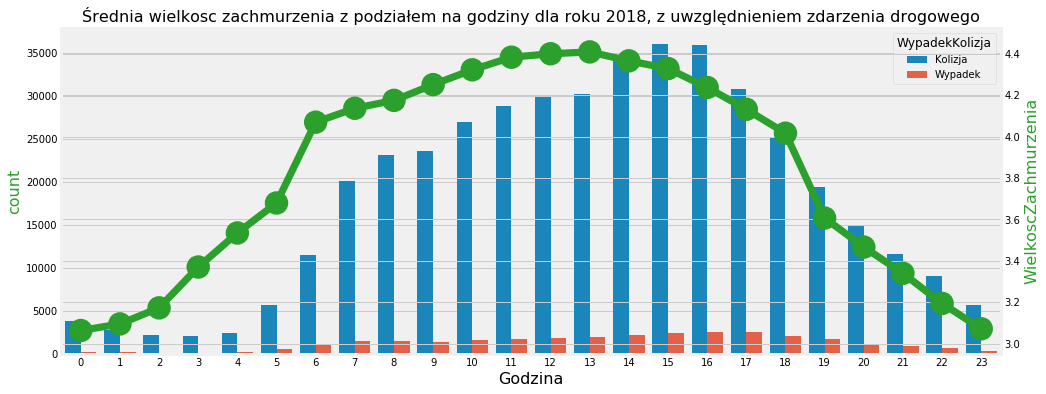

In [109]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [86]:
gZachmurzenieCewik2018=cewik2018.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2018=synop2018.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2018 = gZachmurzenieSynop2018.corr(gZachmurzenieCewik2018)
gZachmurzenie2018

0.8849211856218395

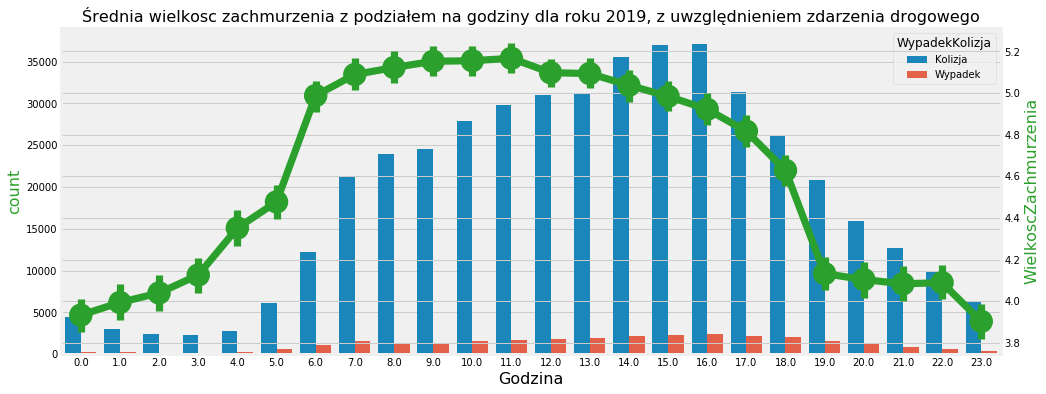

In [110]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na godziny dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='WielkoscZachmurzenia', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [87]:
gZachmurzenieCewik2019=cewik2019.groupby('Godzina')['WypadekKolizja'].count()
gZachmurzenieSynop2019=synop2019.groupby('Godz')['WielkoscZachmurzenia'].mean()
gZachmurzenie2019 = gZachmurzenieSynop2019.corr(gZachmurzenieCewik2019)
gZachmurzenie2019

0.7932268809174209

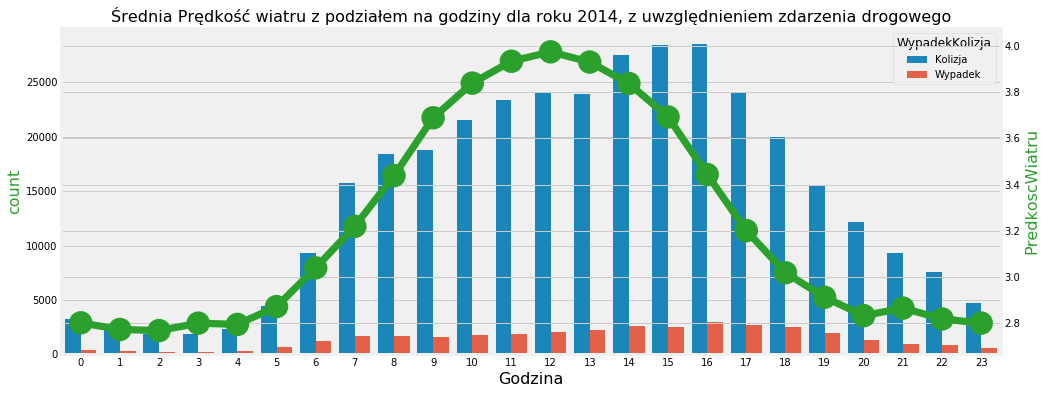

In [182]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [89]:
gPredkoscWiatruCewik2014=cewik2014.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2014=synop2014.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2014 = gPredkoscWiatruSynop2014.corr(gPredkoscWiatruCewik2014)
gPredkoscWiatru2014

0.8382566458449998

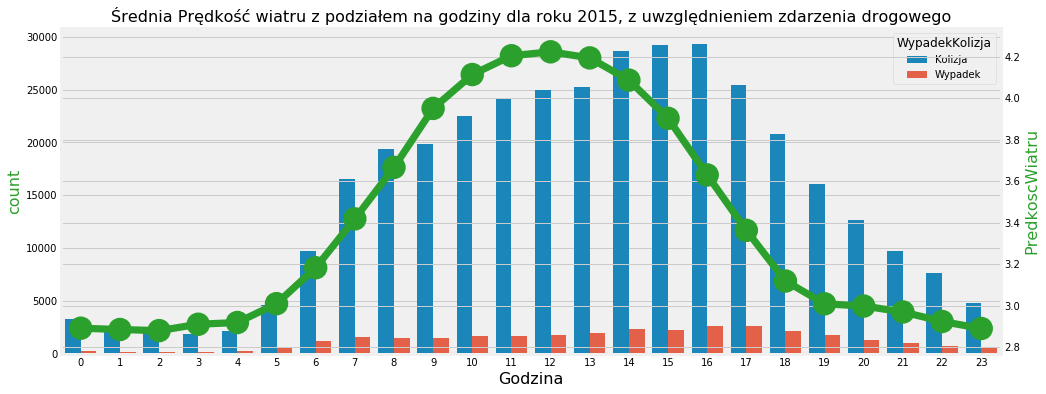

In [112]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [90]:
gPredkoscWiatruCewik2015=cewik2015.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2015=synop2015.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2015 = gPredkoscWiatruSynop2015.corr(gPredkoscWiatruCewik2015)
gPredkoscWiatru2015

0.8329533033592829

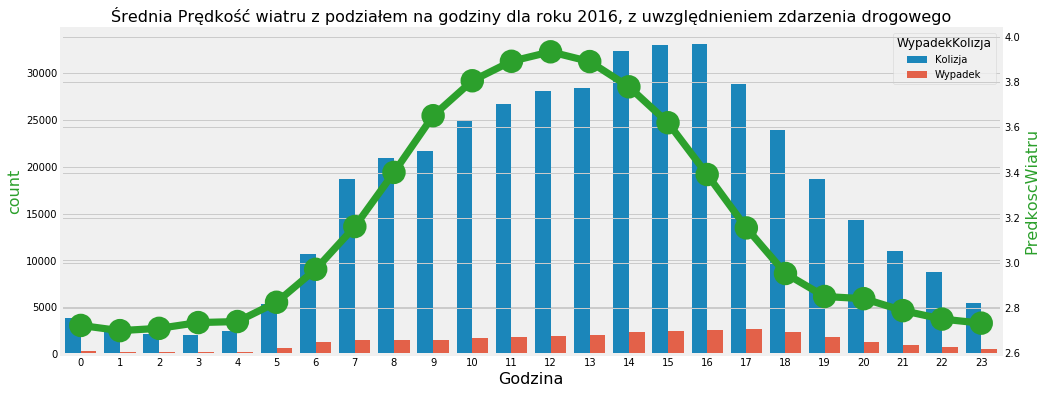

In [113]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [91]:
gPredkoscWiatruCewik2016=cewik2016.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2016=synop2016.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2016 = gPredkoscWiatruSynop2016.corr(gPredkoscWiatruCewik2016)
gPredkoscWiatru2016

0.831863066240987

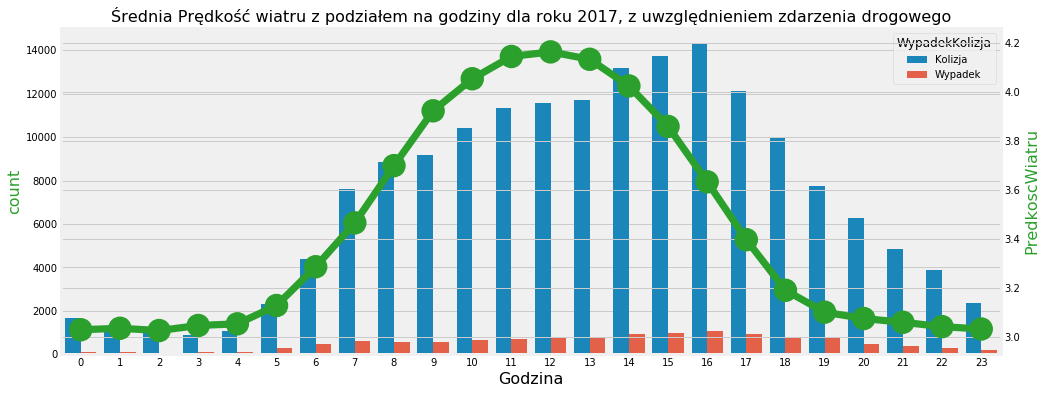

In [114]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [92]:
gPredkoscWiatruCewik2017=cewik2017.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2017=synop2017.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2017 = gPredkoscWiatruSynop2017.corr(gPredkoscWiatruCewik2017)
gPredkoscWiatru2017

0.8065640418700873

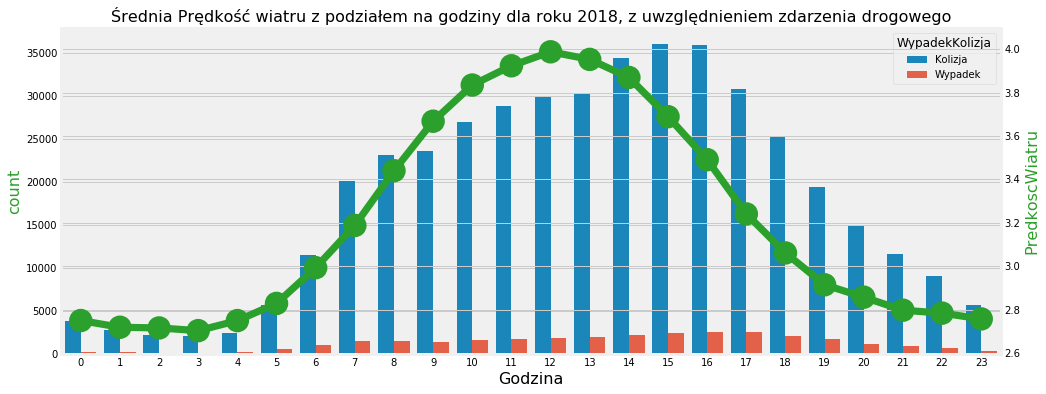

In [115]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [93]:
gPredkoscWiatruCewik2018=cewik2018.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2018=synop2018.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2018 = gPredkoscWiatruSynop2018.corr(gPredkoscWiatruCewik2018)
gPredkoscWiatru2018

0.8657538144308606

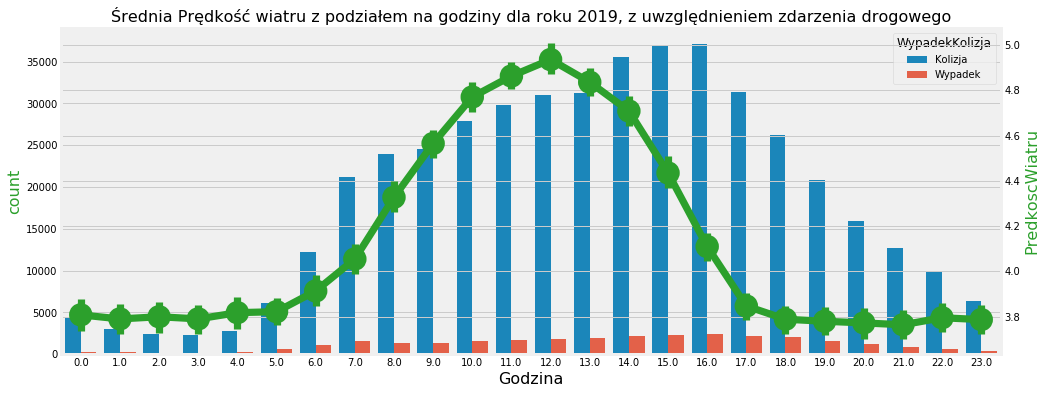

In [116]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Prędkość wiatru z podziałem na godziny dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='PredkoscWiatru', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [94]:
gPredkoscWiatruCewik2019=cewik2019.groupby('Godzina')['WypadekKolizja'].count()
gPredkoscWiatruSynop2019=synop2019.groupby('Godz')['PredkoscWiatru'].mean()
gPredkoscWiatru2019 = gPredkoscWiatruSynop2019.corr(gPredkoscWiatruCewik2019)
gPredkoscWiatru2019

0.6993529222947987

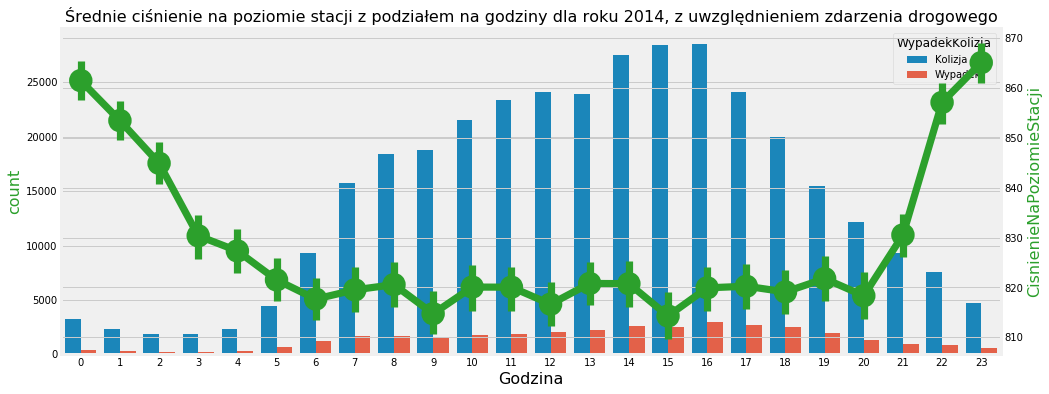

In [123]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [95]:
gCisnienieStacjaCewik2014=cewik2014.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2014=synop2014.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2014 = gCisnienieStacjaSynop2014.corr(gCisnienieStacjaCewik2014)
gCisnienieStacja2014

-0.6717034522403114

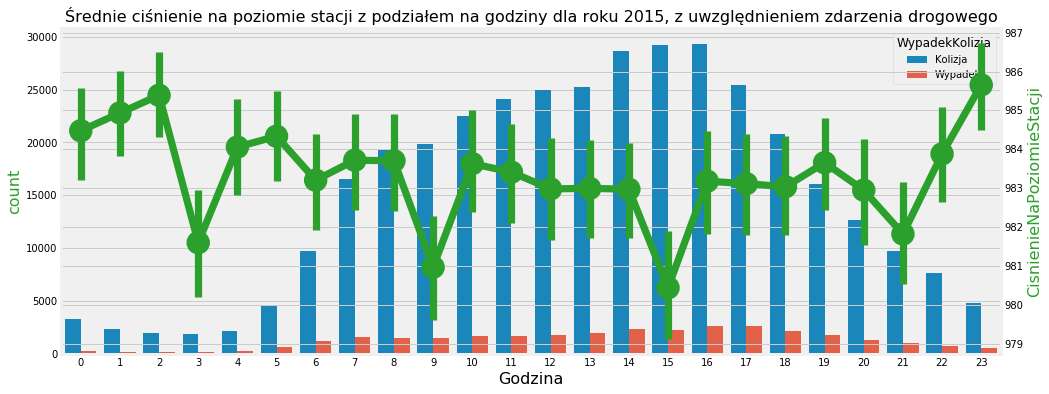

In [124]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [96]:
gCisnienieStacjaCewik2015=cewik2015.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2015=synop2015.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2015 = gCisnienieStacjaSynop2015.corr(gCisnienieStacjaCewik2015)
gCisnienieStacja2015

-0.4932579121979362

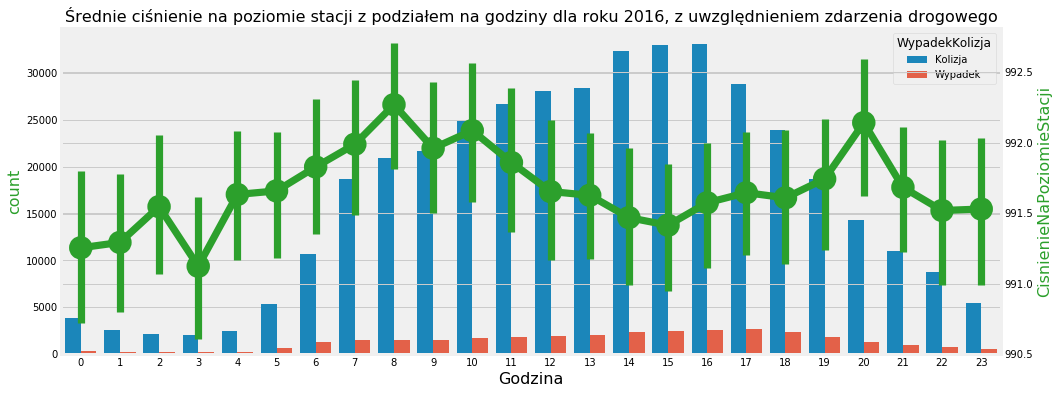

In [125]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [97]:
gCisnienieStacjaCewik2016=cewik2016.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2016=synop2016.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2016 = gCisnienieStacjaSynop2016.corr(gCisnienieStacjaCewik2016)
gCisnienieStacja2016

0.3001520979690646

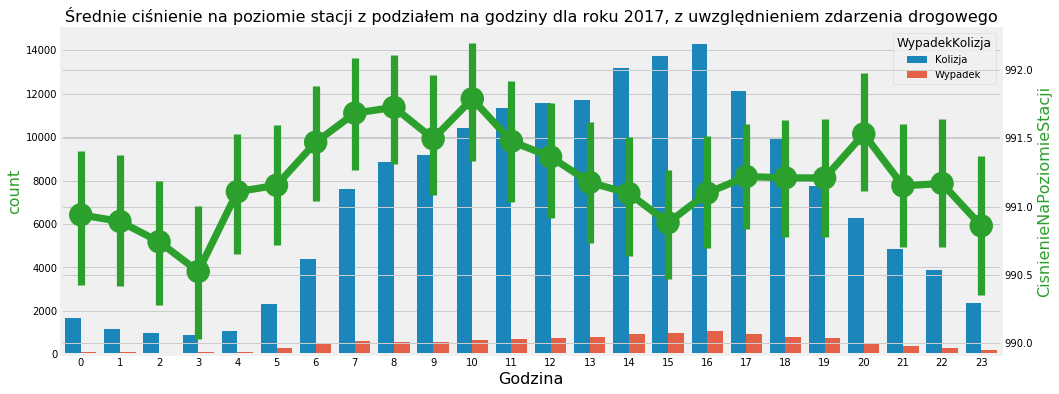

In [126]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [98]:
gCisnienieStacjaCewik2017=cewik2017.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2017=synop2017.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2017 = gCisnienieStacjaSynop2017.corr(gCisnienieStacjaCewik2017)
gCisnienieStacja2017

0.421018712296604

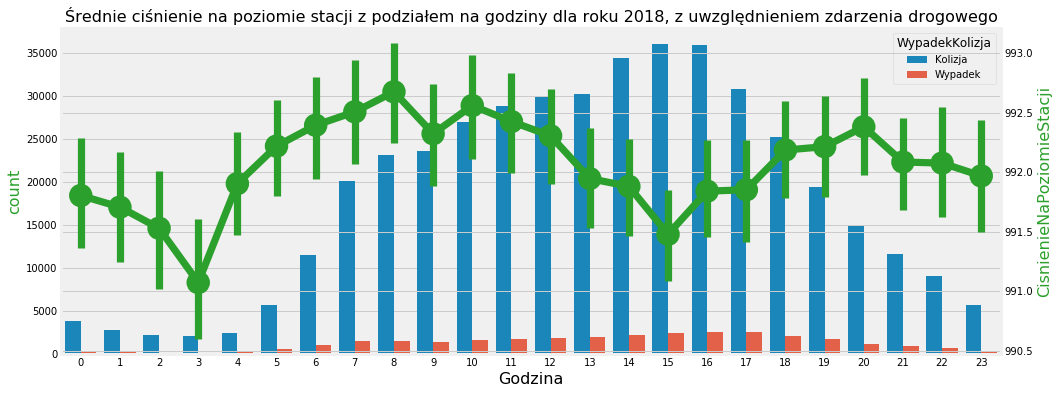

In [127]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [99]:
gCisnienieStacjaCewik2018=cewik2018.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2018=synop2018.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2018 = gCisnienieStacjaSynop2018.corr(gCisnienieStacjaCewik2018)
gCisnienieStacja2018

0.2649559936418632

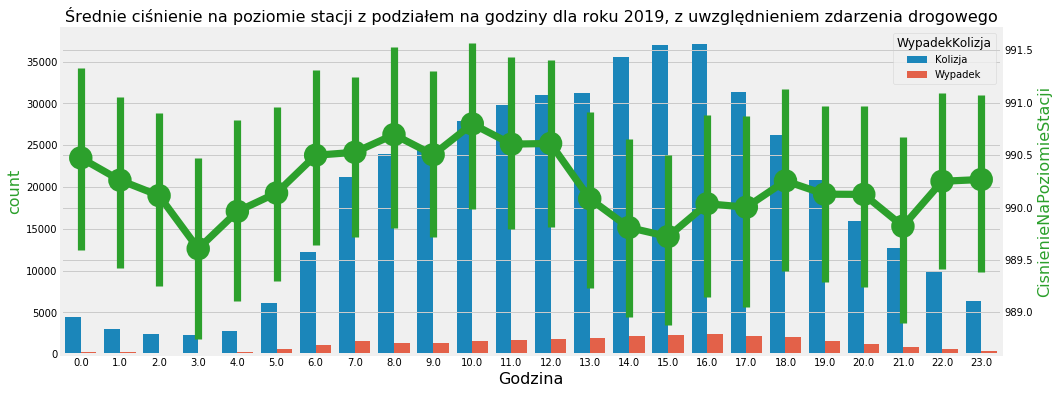

In [128]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na godziny dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='CisnienieNaPoziomieStacji', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [100]:
gCisnienieStacjaCewik2019=cewik2019.groupby('Godzina')['WypadekKolizja'].count()
gCisnienieStacjaSynop2019=synop2019.groupby('Godz')['CisnienieNaPoziomieStacji'].mean()
gCisnienieStacja2019 = gCisnienieStacjaSynop2019.corr(gCisnienieStacjaCewik2019)
gCisnienieStacja2019

0.08732800984434116

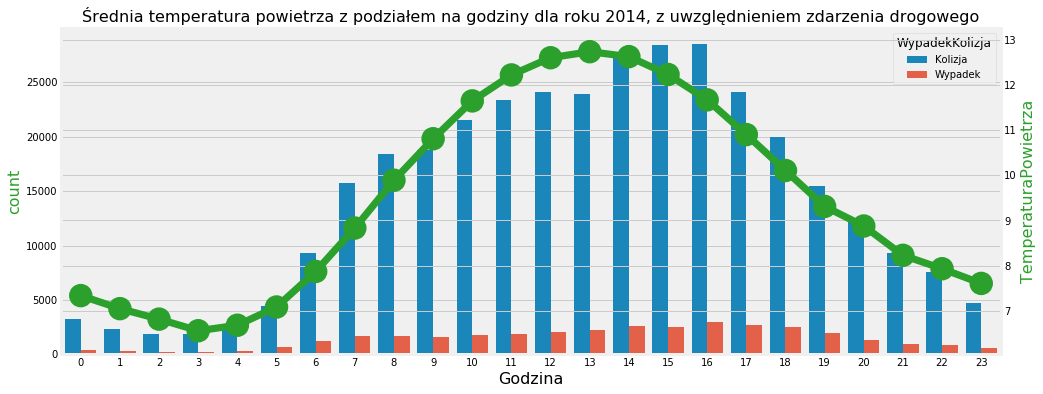

In [130]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [101]:
gTemperaturaPowietrzaCewik2014=cewik2014.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2014=synop2014.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2014 = gTemperaturaPowietrzaSynop2014.corr(gTemperaturaPowietrzaCewik2014)
gTemperaturaPowietrza2014

0.9625873006028627

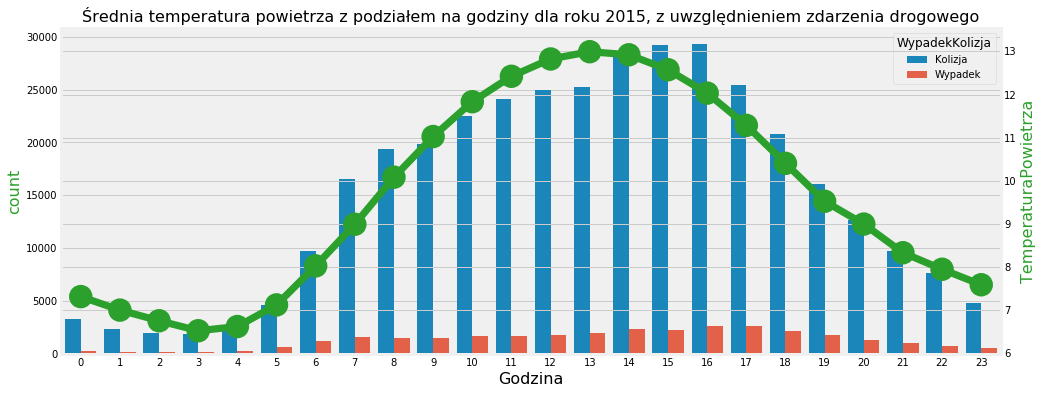

In [131]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [102]:
gTemperaturaPowietrzaCewik2015=cewik2015.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2015=synop2015.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2015 = gTemperaturaPowietrzaSynop2015.corr(gTemperaturaPowietrzaCewik2015)
gTemperaturaPowietrza2015

0.9702670179865209

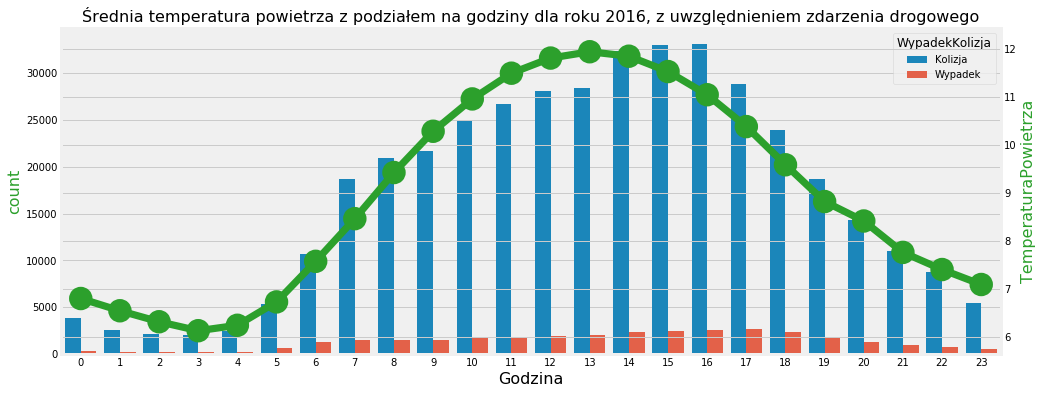

In [132]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [103]:
gTemperaturaPowietrzaCewik2016=cewik2016.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2016=synop2016.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2016 = gTemperaturaPowietrzaSynop2016.corr(gTemperaturaPowietrzaCewik2016)
gTemperaturaPowietrza2016

0.96810846386292

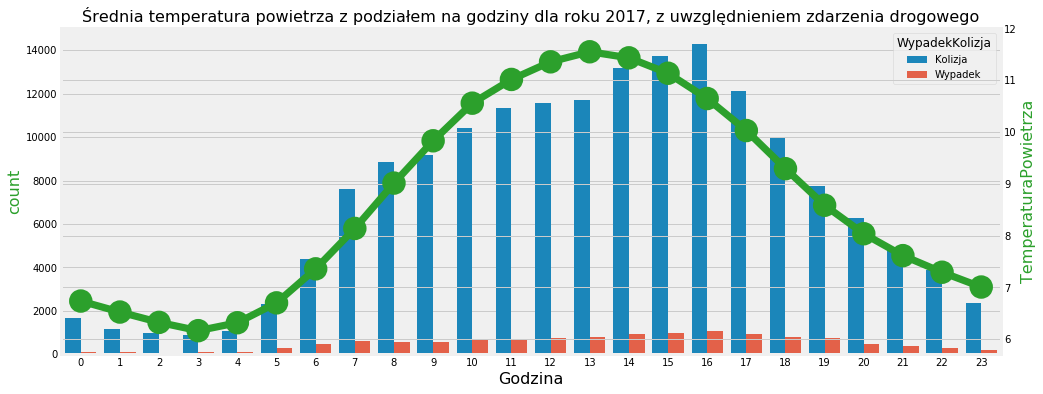

In [133]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [104]:
gTemperaturaPowietrzaCewik2017=cewik2017.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2017=synop2017.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2017 = gTemperaturaPowietrzaSynop2017.corr(gTemperaturaPowietrzaCewik2017)
gTemperaturaPowietrza2017

0.9650011033414096

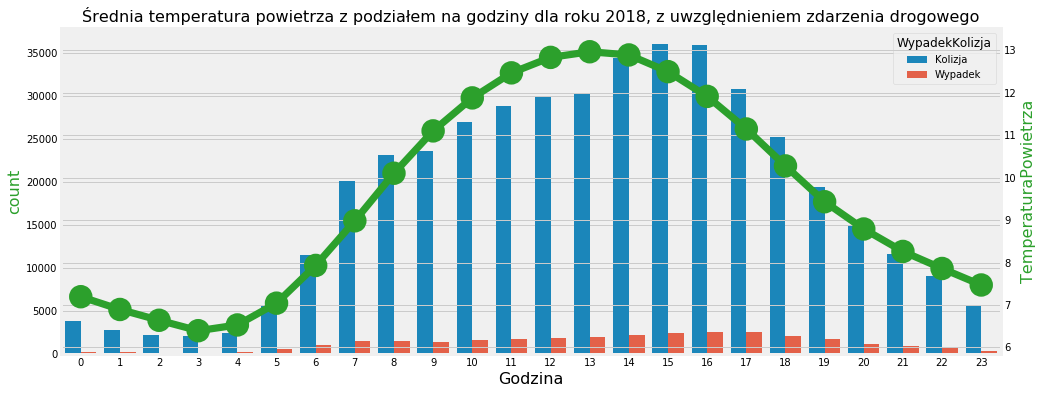

In [134]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [106]:
gTemperaturaPowietrzaCewik2018=cewik2018.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2018=synop2018.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2018 = gTemperaturaPowietrzaSynop2018.corr(gTemperaturaPowietrzaCewik2018)
gTemperaturaPowietrza2018

0.96565881635423

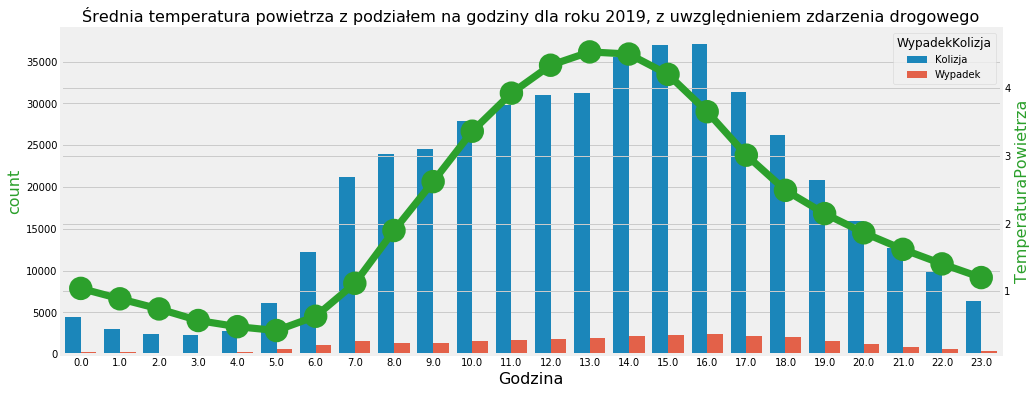

In [183]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na godziny dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='TemperaturaPowietrza', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [107]:
gTemperaturaPowietrzaCewik2019=cewik2019.groupby('Godzina')['WypadekKolizja'].count()
gTemperaturaPowietrzaSynop2019=synop2019.groupby('Godz')['TemperaturaPowietrza'].mean()
gTemperaturaPowietrza2019 = gTemperaturaPowietrzaSynop2019.corr(gTemperaturaPowietrzaCewik2019)
gTemperaturaPowietrza2019

0.9164738856773563

## Badanie dniowe

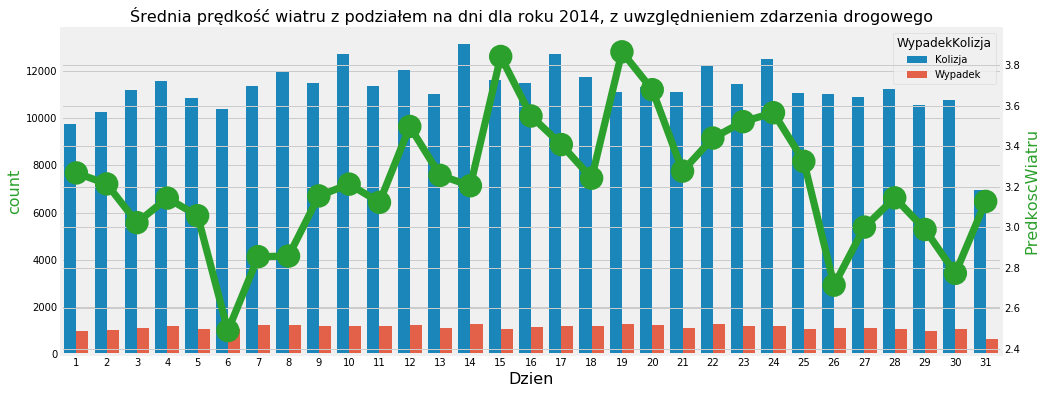

In [36]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [108]:
dPredkoscWiatruCewik2014=cewik2014.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2014=synop2014.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2014 = dPredkoscWiatruSynop2014.corr(dPredkoscWiatruCewik2014)
dPredkoscWiatru2014

0.25593535381780536

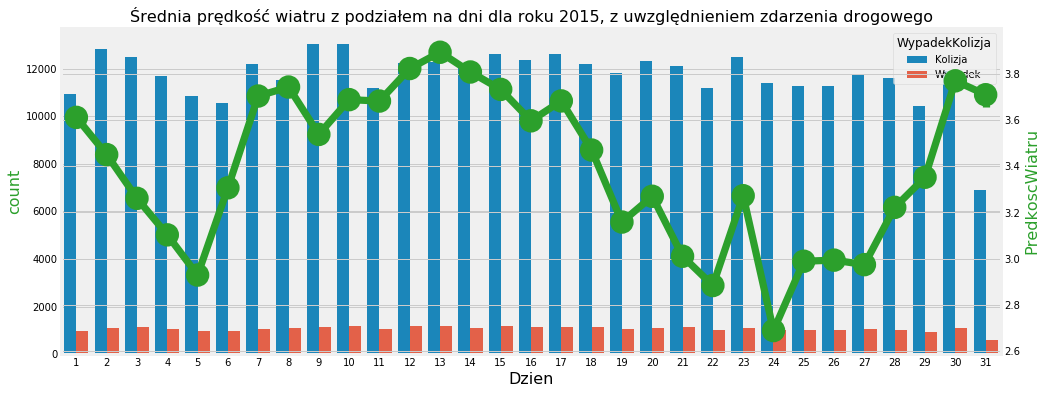

In [37]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [109]:
dPredkoscWiatruCewik2015=cewik2015.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2015=synop2015.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2015 = dPredkoscWiatruSynop2015.corr(dPredkoscWiatruCewik2015)
dPredkoscWiatru2015

0.1263927778425377

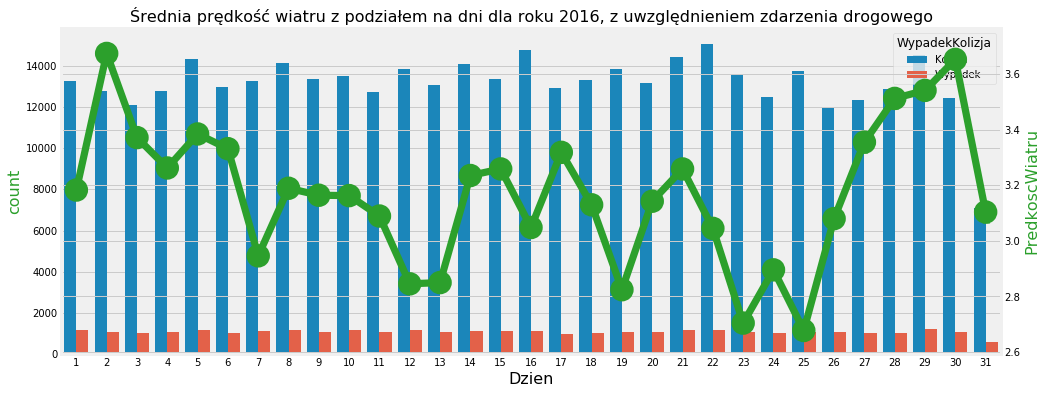

In [38]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [110]:
dPredkoscWiatruCewik2016=cewik2016.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2016=synop2016.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2016 = dPredkoscWiatruSynop2016.corr(dPredkoscWiatruCewik2016)
dPredkoscWiatru2016

-0.0687244514954037

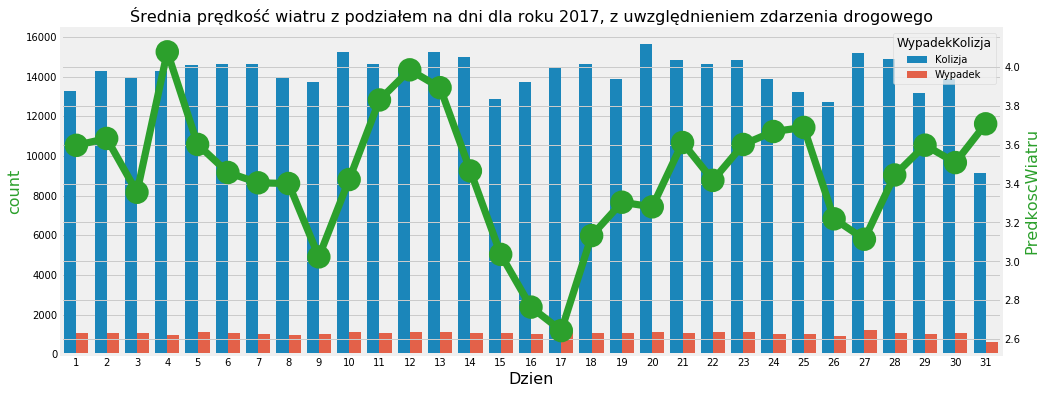

In [23]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x='Dzien', hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [111]:
dPredkoscWiatruCewik2017=cewik2017.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2017=synop2017.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2017 = dPredkoscWiatruSynop2017.corr(dPredkoscWiatruCewik2017)
dPredkoscWiatru2017

-0.035481788056184425

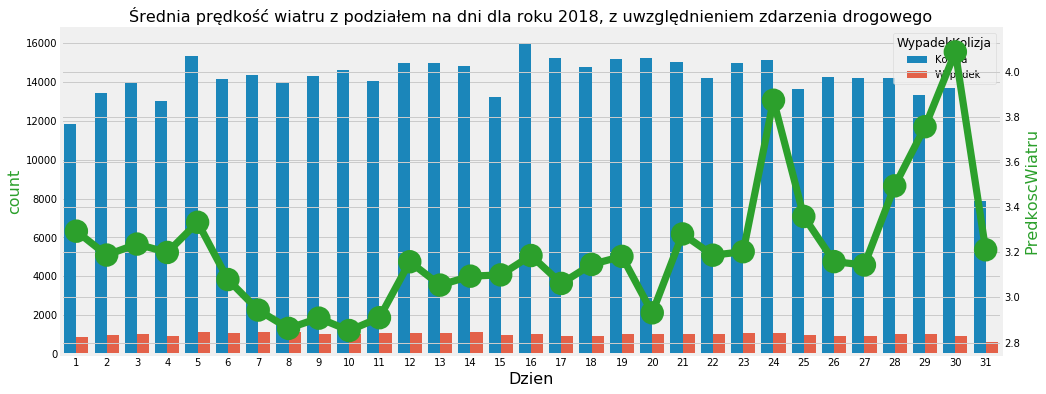

In [40]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [112]:
dPredkoscWiatruCewik2018=cewik2018.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2018=synop2018.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2018 = dPredkoscWiatruSynop2018.corr(dPredkoscWiatruCewik2018)
dPredkoscWiatru2018

-0.09842413478555953

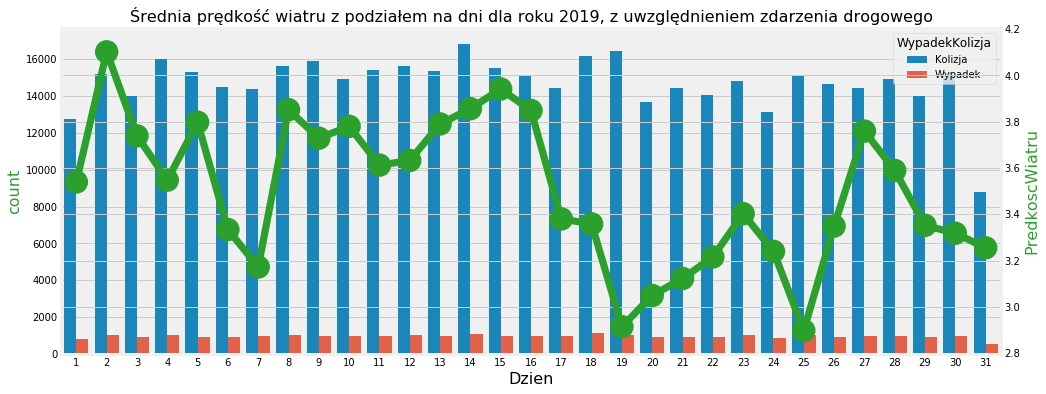

In [41]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na dni dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='PredkoscWiatru', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [113]:
dPredkoscWiatruCewik2019=cewik2019.groupby('Dzien')['WypadekKolizja'].count()
dPredkoscWiatruSynop2019=synop2019.groupby('Dzien')['PredkoscWiatru'].mean()
dPredkoscWiatru2019 = dPredkoscWiatruSynop2019.corr(dPredkoscWiatruCewik2019)
dPredkoscWiatru2019

0.28641123020029147

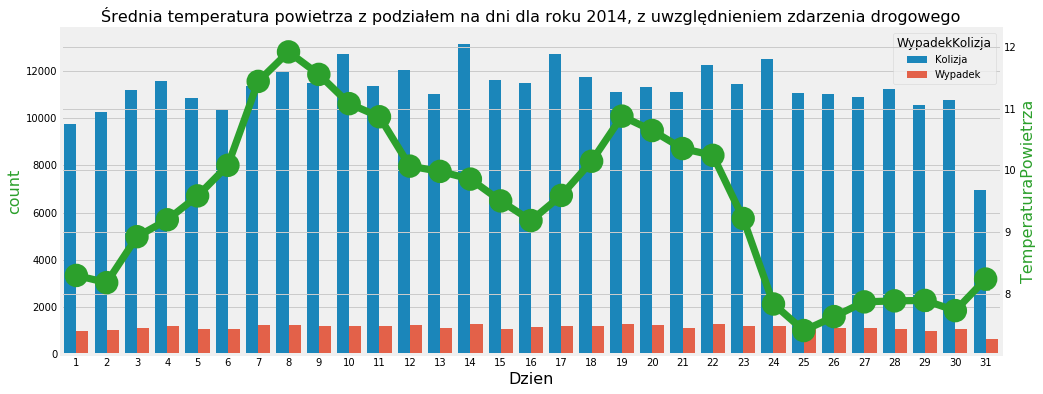

In [42]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [114]:
dTemperaturaPowietrzaCewik2014=cewik2014.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2014=synop2014.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2014 = dTemperaturaPowietrzaSynop2014.corr(dTemperaturaPowietrzaCewik2014)
dTemperaturaPowietrza2014

0.3936427815758643

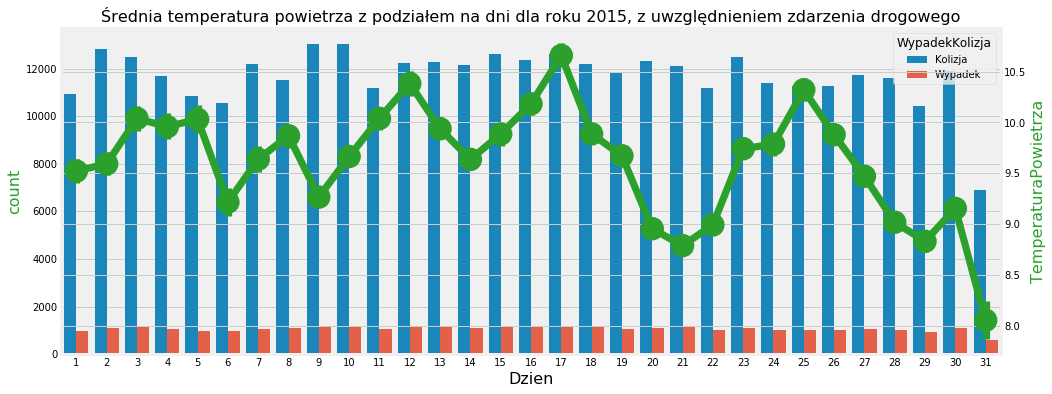

In [43]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [115]:
dTemperaturaPowietrzaCewik2015=cewik2015.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2015=synop2015.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2015 = dTemperaturaPowietrzaSynop2015.corr(dTemperaturaPowietrzaCewik2015)
dTemperaturaPowietrza2015

0.534641791994176

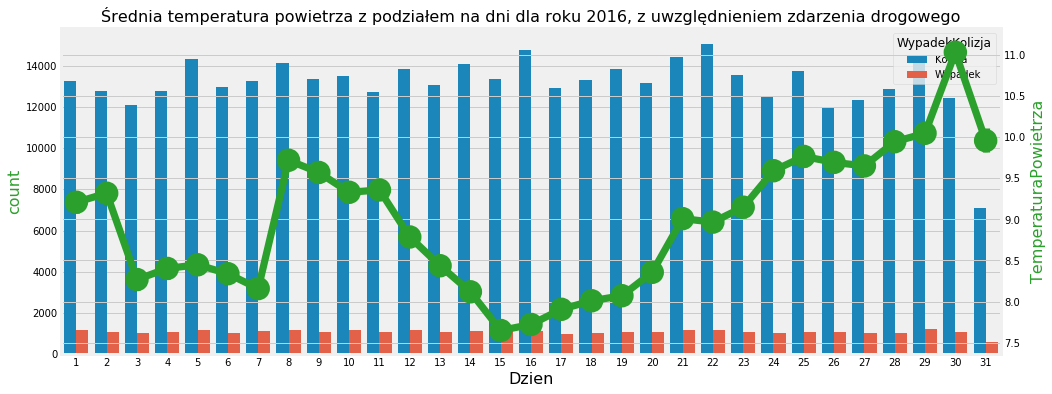

In [44]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [116]:
dTemperaturaPowietrzaCewik2016=cewik2016.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2016=synop2016.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2016 = dTemperaturaPowietrzaSynop2016.corr(dTemperaturaPowietrzaCewik2016)
dTemperaturaPowietrza2016

-0.2845677671745765

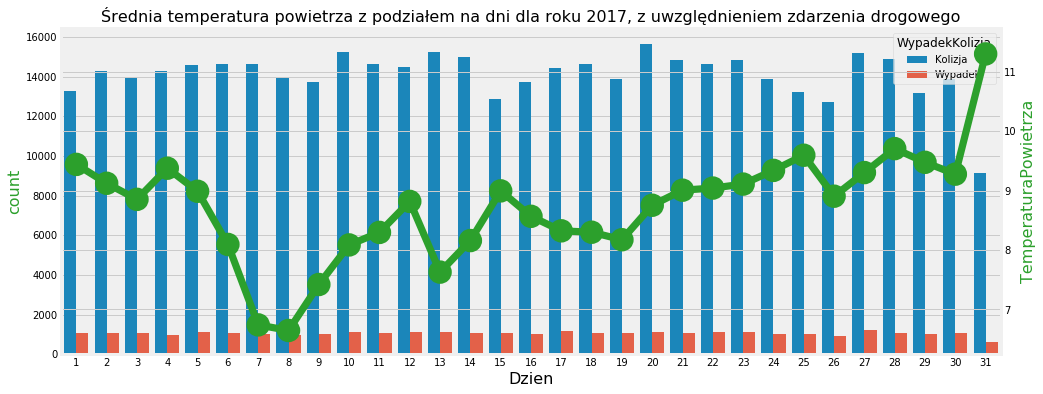

In [24]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [117]:
dTemperaturaPowietrzaCewik2017=cewik2017.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2017=synop2017.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2017 = dTemperaturaPowietrzaSynop2017.corr(dTemperaturaPowietrzaCewik2017)
dTemperaturaPowietrza2017

-0.5111243663990553

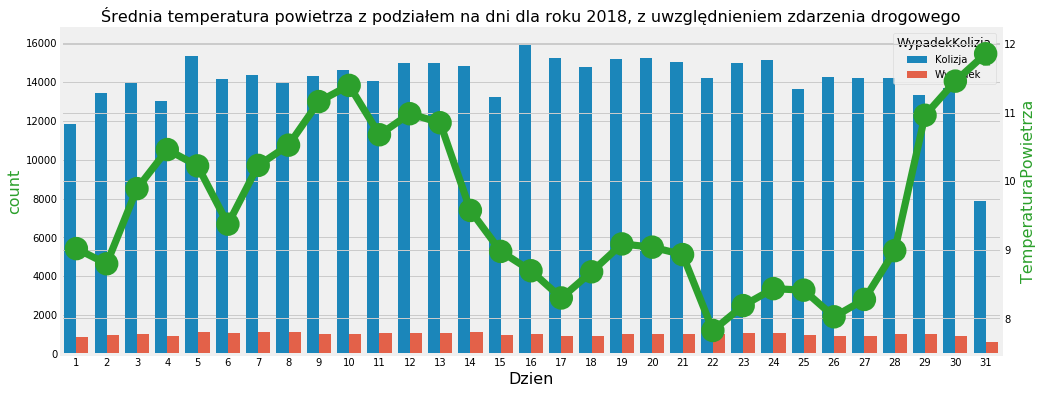

In [46]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [118]:
dTemperaturaPowietrzaCewik2018=cewik2018.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2018=synop2018.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2018 = dTemperaturaPowietrzaSynop2018.corr(dTemperaturaPowietrzaCewik2018)
dTemperaturaPowietrza2018

-0.34122265750519903

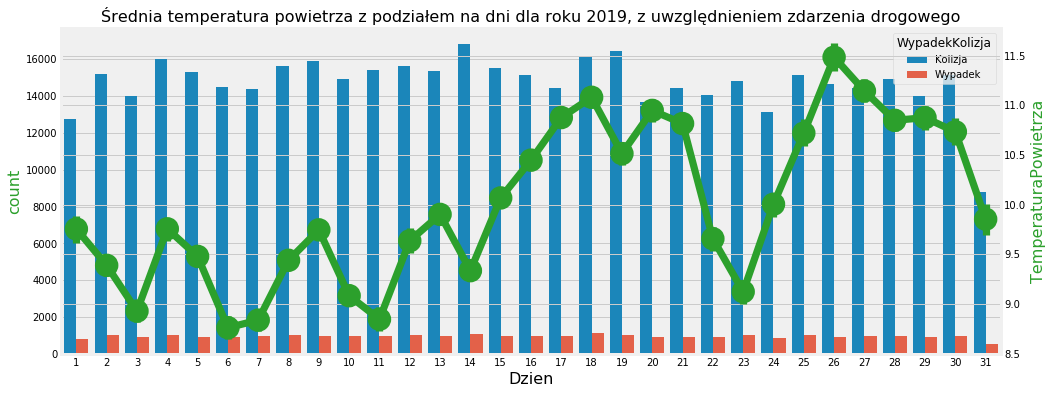

In [47]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia temperatura powietrza z podziałem na dni dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='TemperaturaPowietrza', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [119]:
dTemperaturaPowietrzaCewik2019=cewik2019.groupby('Dzien')['WypadekKolizja'].count()
dTemperaturaPowietrzaSynop2019=synop2019.groupby('Dzien')['TemperaturaPowietrza'].mean()
dTemperaturaPowietrza2019 = dTemperaturaPowietrzaSynop2019.corr(dTemperaturaPowietrzaCewik2019)
dTemperaturaPowietrza2019

-0.014598013705014545

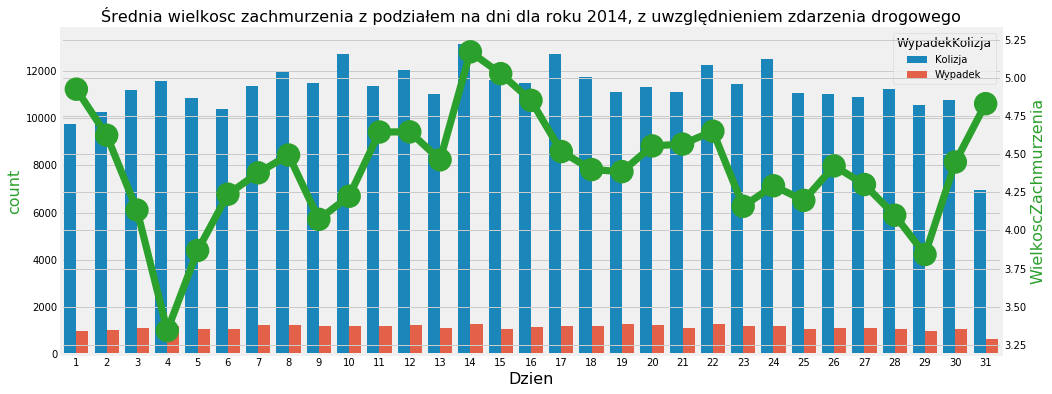

In [48]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [121]:
dZachmurzenieCewik2014=cewik2014.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2014=synop2014.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2014 = dZachmurzenieSynop2014.corr(dZachmurzenieCewik2014)
dZachmurzenie2014

-0.042088124750759966

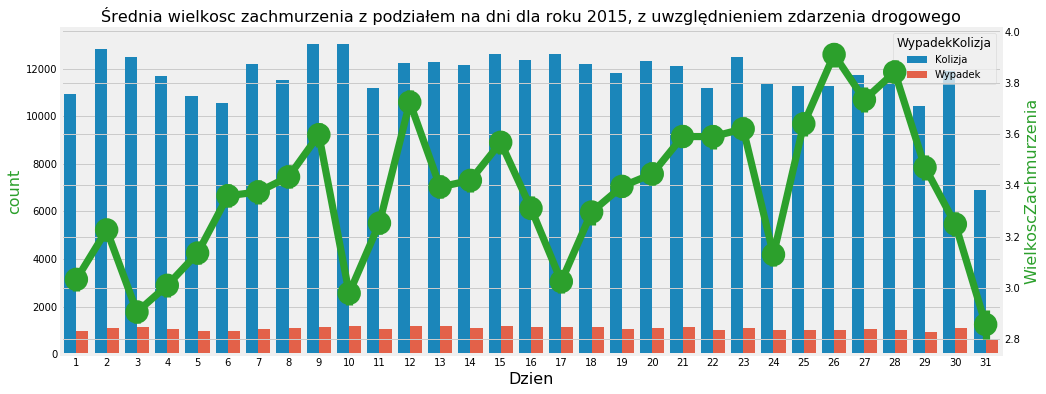

In [49]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [122]:
dZachmurzenieCewik2015=cewik2015.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2015=synop2015.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2015 = dZachmurzenieSynop2015.corr(dZachmurzenieCewik2015)
dZachmurzenie2015

0.21884393804730742

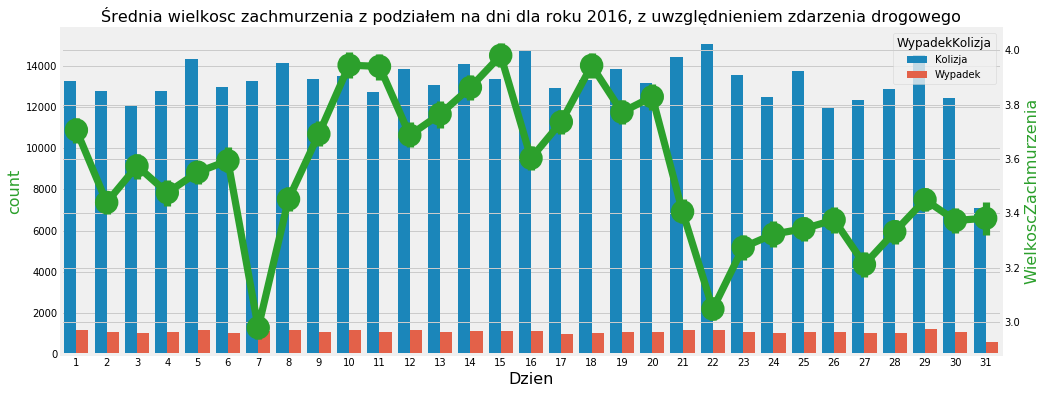

In [50]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [123]:
dZachmurzenieCewik2016=cewik2016.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2016=synop2016.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2016 = dZachmurzenieSynop2016.corr(dZachmurzenieCewik2016)
dZachmurzenie2016

0.0820380687731725

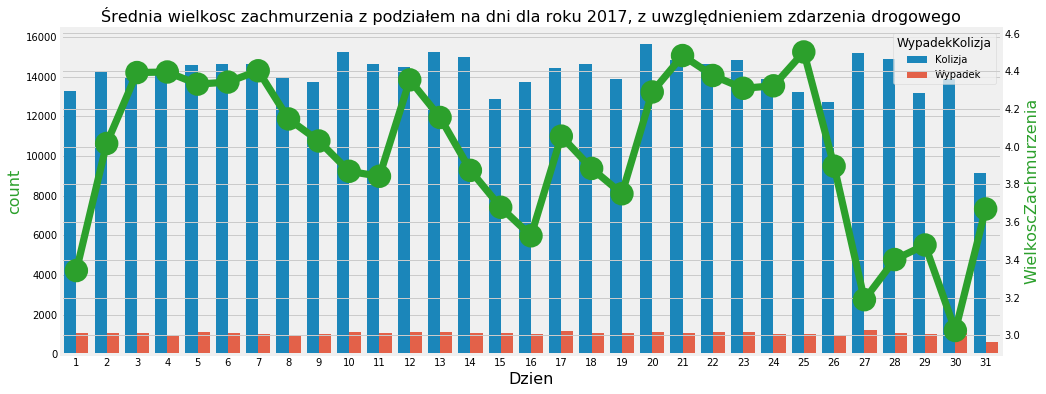

In [25]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [124]:
dZachmurzenieCewik2017=cewik2017.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2017=synop2017.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2017 = dZachmurzenieSynop2017.corr(dZachmurzenieCewik2017)
dZachmurzenie2017

0.22741400366070783

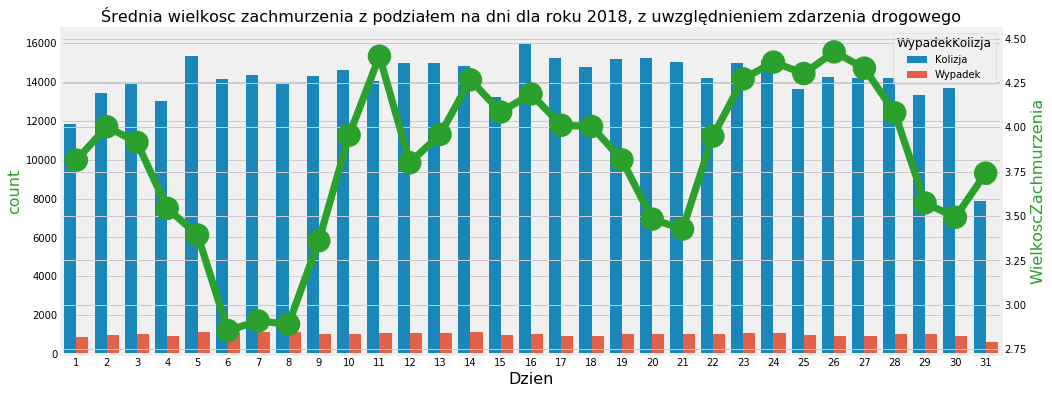

In [52]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [125]:
dZachmurzenieCewik2018=cewik2018.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2018=synop2018.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2018 = dZachmurzenieSynop2018.corr(dZachmurzenieCewik2018)
dZachmurzenie2018

0.06752052307594411

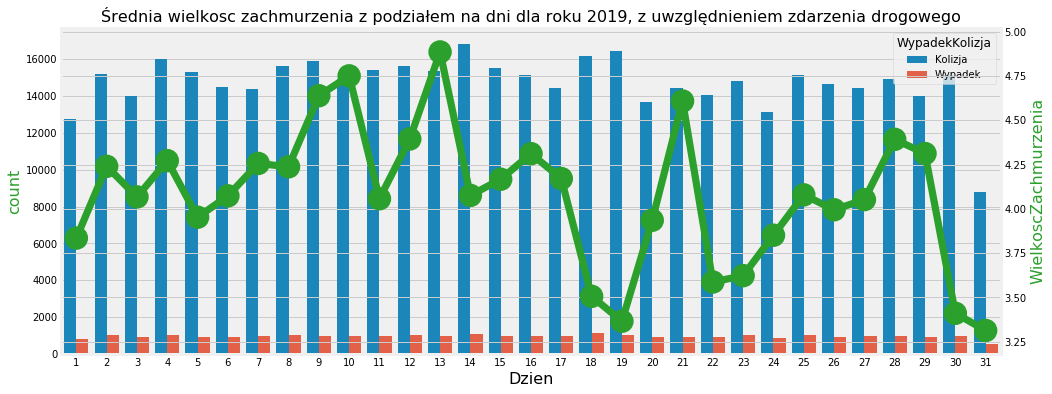

In [53]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkosc zachmurzenia z podziałem na dni dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='WielkoscZachmurzenia', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [126]:
dZachmurzenieCewik2019=cewik2019.groupby('Dzien')['WypadekKolizja'].count()
dZachmurzenieSynop2019=synop2019.groupby('Dzien')['WielkoscZachmurzenia'].mean()
dZachmurzenie2019 = dZachmurzenieSynop2019.corr(dZachmurzenieCewik2019)
dZachmurzenie2019

0.3118628931147569

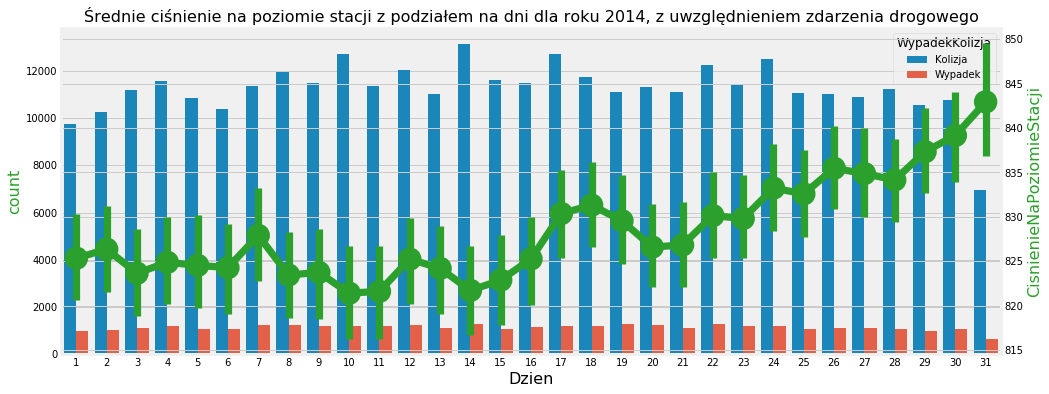

In [185]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [127]:
dCisnienieStacjaCewik2014=cewik2014.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2014=synop2014.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2014 = dCisnienieStacjaSynop2014.corr(dCisnienieStacjaCewik2014)
dCisnienieStacja2014

-0.48891948288192383

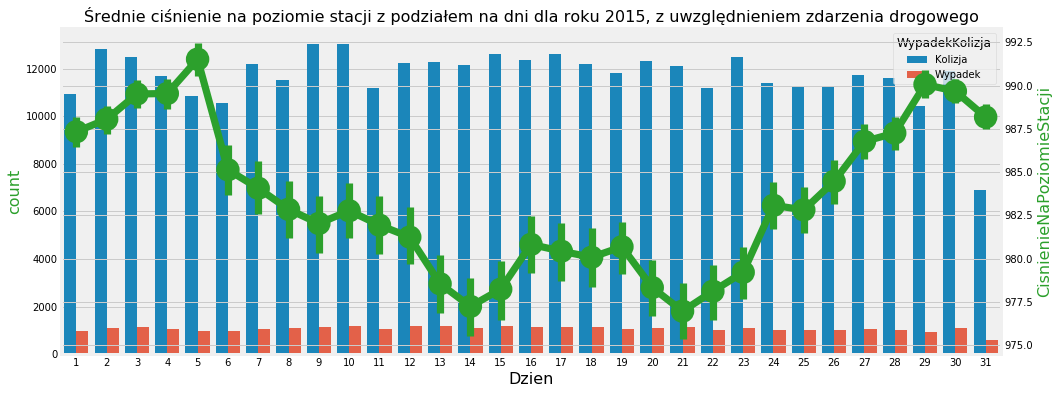

In [55]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [129]:
dCisnienieStacjaCewik2015=cewik2015.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2015=synop2015.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2015 = dCisnienieStacjaSynop2015.corr(dCisnienieStacjaCewik2015)
dCisnienieStacja2015

-0.40368318300481687

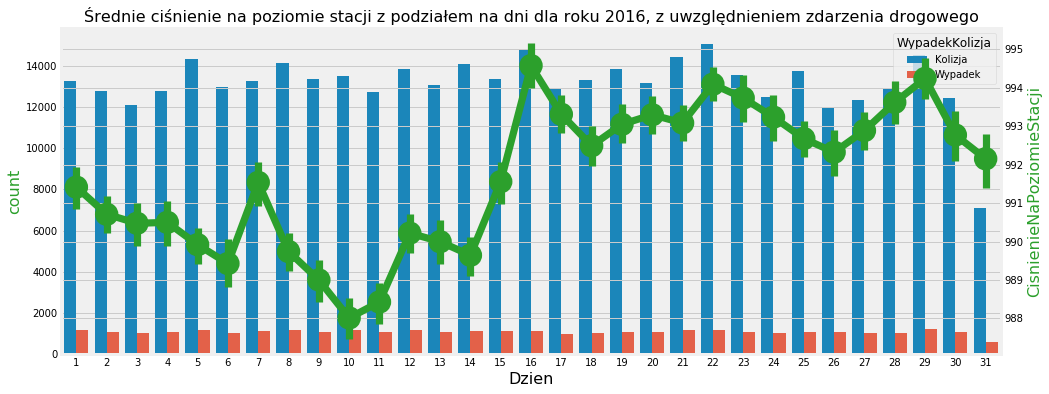

In [56]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [130]:
dCisnienieStacjaCewik2016=cewik2016.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2016=synop2016.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2016 = dCisnienieStacjaSynop2016.corr(dCisnienieStacjaCewik2016)
dCisnienieStacja2016

0.05869714947080985

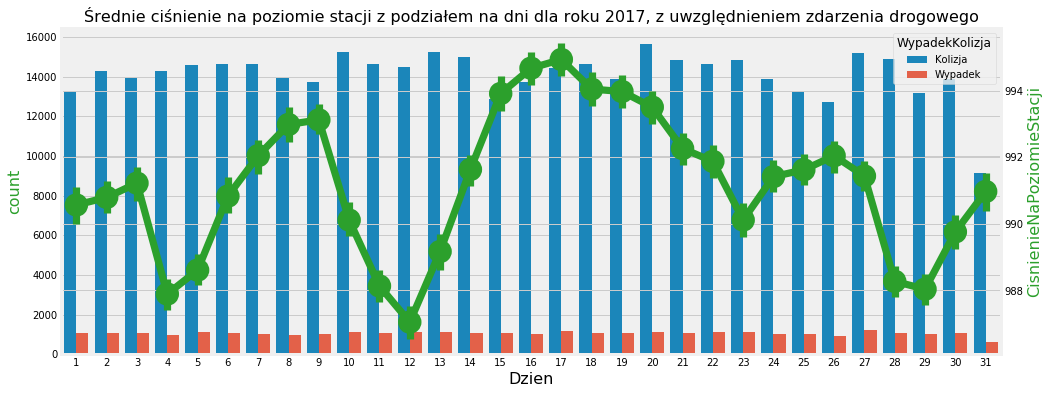

In [26]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [131]:
dCisnienieStacjaCewik2017=cewik2017.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2017=synop2017.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2017 = dCisnienieStacjaSynop2017.corr(dCisnienieStacjaCewik2017)
dCisnienieStacja2017

-0.08097852735398188

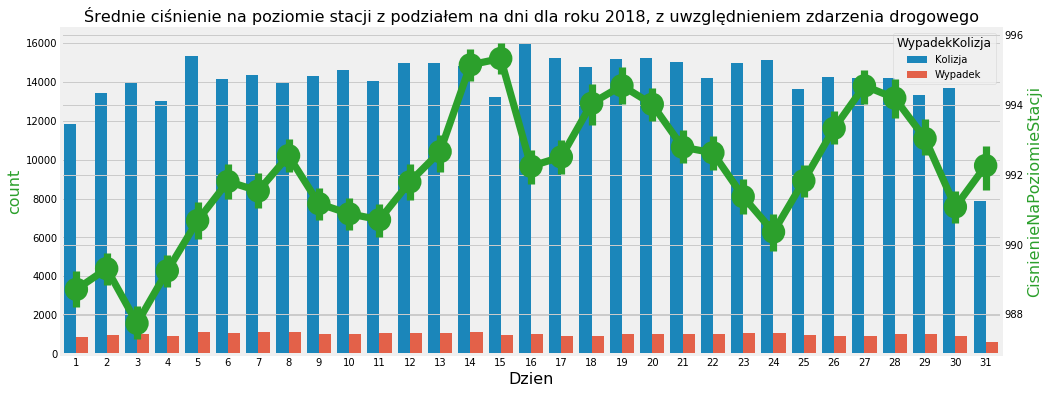

In [58]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [132]:
dCisnienieStacjaCewik2018=cewik2018.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2018=synop2018.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2018 = dCisnienieStacjaSynop2018.corr(dCisnienieStacjaCewik2018)
dCisnienieStacja2018

0.17271674503141335

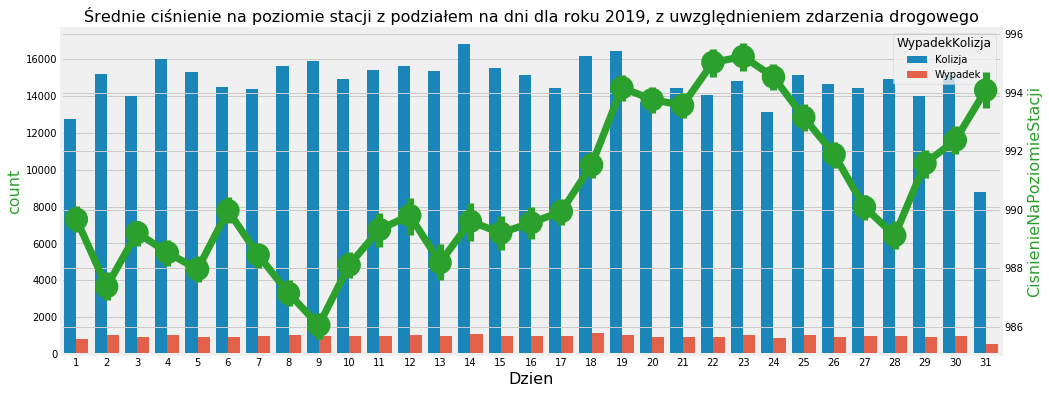

In [59]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem na dni dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='CisnienieNaPoziomieStacji', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [133]:
dCisnienieStacjaCewik2019=cewik2019.groupby('Dzien')['WypadekKolizja'].count()
dCisnienieStacjaSynop2019=synop2019.groupby('Dzien')['CisnienieNaPoziomieStacji'].mean()
dCisnienieStacja2019 = dCisnienieStacjaSynop2019.corr(dCisnienieStacjaCewik2019)
dCisnienieStacja2019

-0.3859012791353727

## Badanie średniej wielkości widzialności z podziałem na Miesiąc, Dzień, Godzinę, Rok

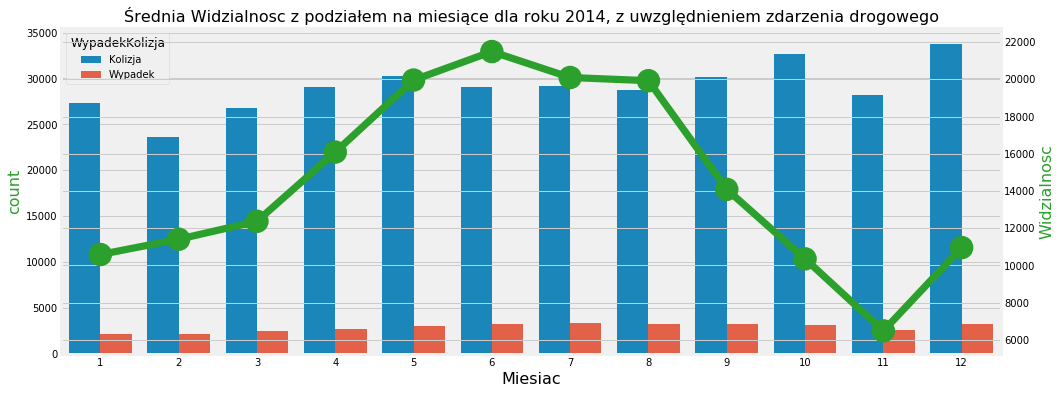

In [135]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [136]:
mWidzialnoscCewik2014=cewik2014.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2014=synop2014.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2014 = mWidzialnoscSynop2014.corr(mWidzialnoscCewik2014)
mWidzialnosc2014

0.14082921700411147

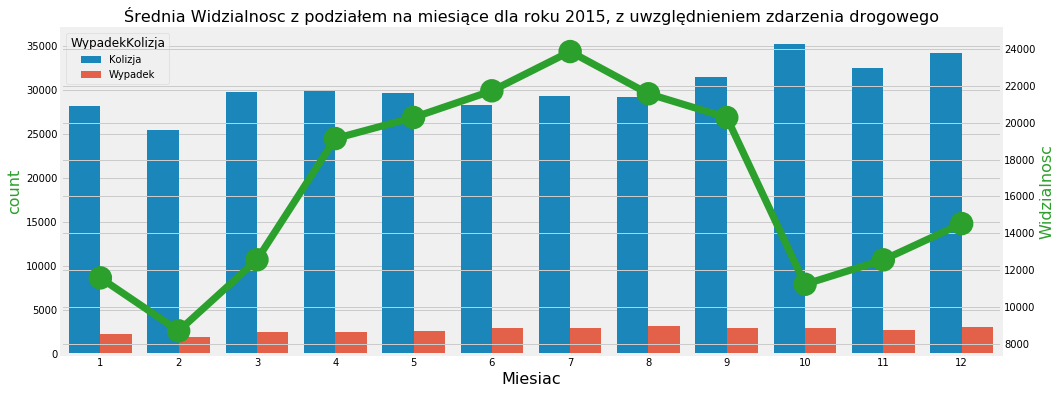

In [137]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [138]:
mWidzialnoscCewik2015=cewik2015.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2015=synop2015.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2015 = mWidzialnoscSynop2015.corr(mWidzialnoscCewik2015)
mWidzialnosc2015

-0.005670403346195792

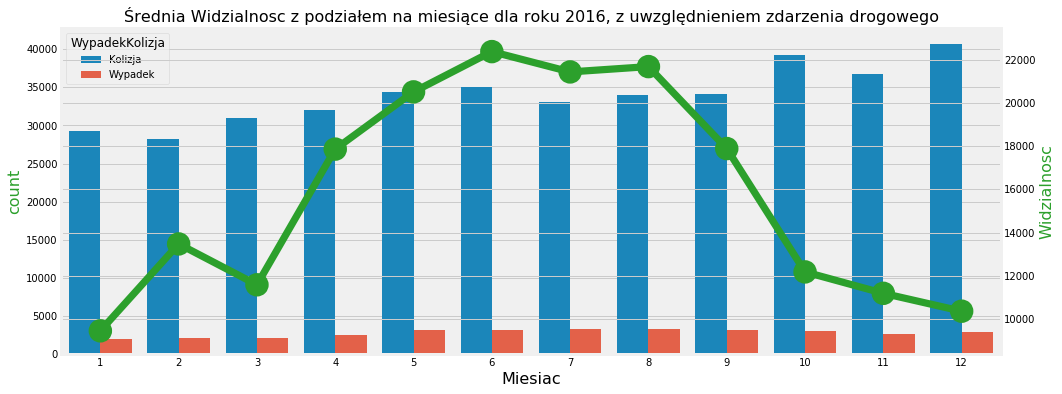

In [139]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [140]:
mWidzialnoscCewik2016=cewik2016.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2016=synop2016.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2016 = mWidzialnoscSynop2016.corr(mWidzialnoscCewik2016)
mWidzialnosc2016

0.030848798365872458

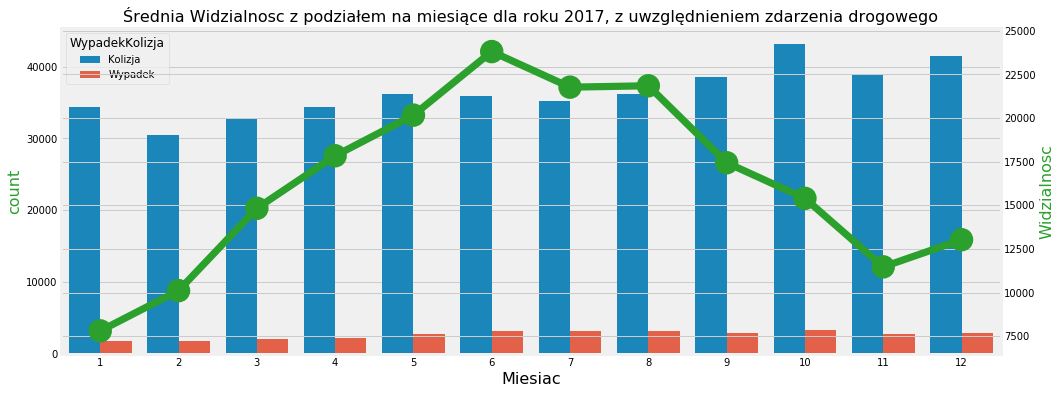

In [180]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [181]:
mWidzialnoscCewik2017=cewik2017.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2017=synop2017.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2017 = mWidzialnoscSynop2017.corr(mWidzialnoscCewik2017)
mWidzialnosc2017

0.14808675125963627

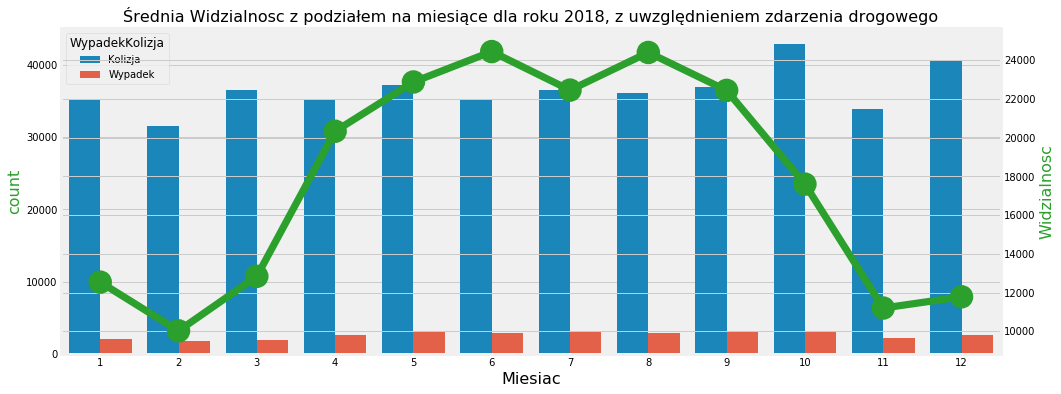

In [143]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [144]:
mWidzialnoscCewik2018=cewik2018.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2018=synop2018.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2018 = mWidzialnoscSynop2018.corr(mWidzialnoscCewik2018)
mWidzialnosc2018

0.2618790071713996

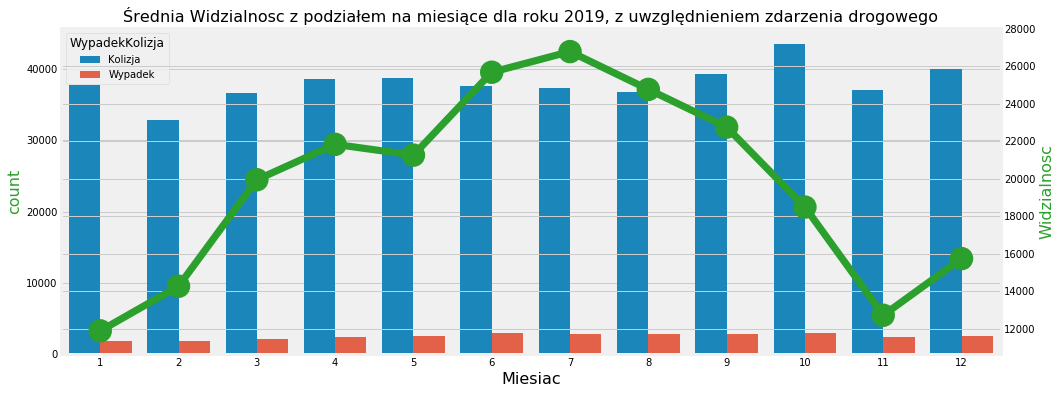

In [145]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na miesiące dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Miesiac", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Miesiac', y='Widzialnosc', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [146]:
mWidzialnoscCewik2019=cewik2019.groupby('Miesiac')['WypadekKolizja'].count()
mWidzialnoscSynop2019=synop2019.groupby('Miesiac')['Widzialnosc'].mean()
mWidzialnosc2019 = mWidzialnoscSynop2019.corr(mWidzialnoscCewik2019)
mWidzialnosc2019

0.19944703177179526

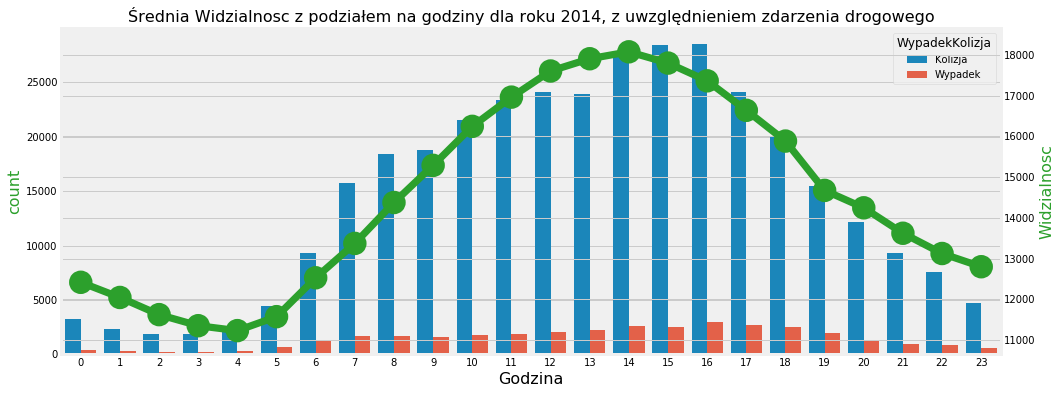

In [148]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [149]:
gWidzialnoscCewik2014=cewik2014.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2014=synop2014.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2014 = gWidzialnoscSynop2014.corr(gWidzialnoscCewik2014)
gWidzialnosc2014

0.9662510228099928

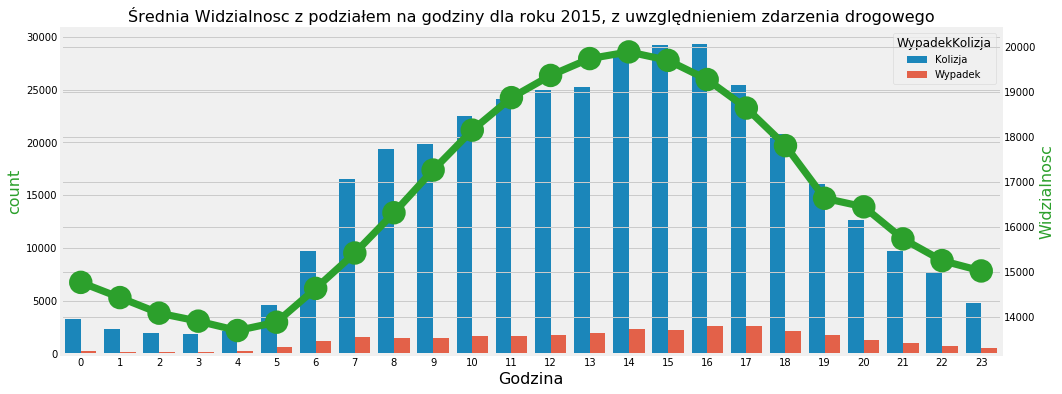

In [150]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [151]:
gWidzialnoscCewik2015=cewik2015.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2015=synop2015.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2015 = gWidzialnoscSynop2015.corr(gWidzialnoscCewik2015)
gWidzialnosc2015

0.9594914782567586

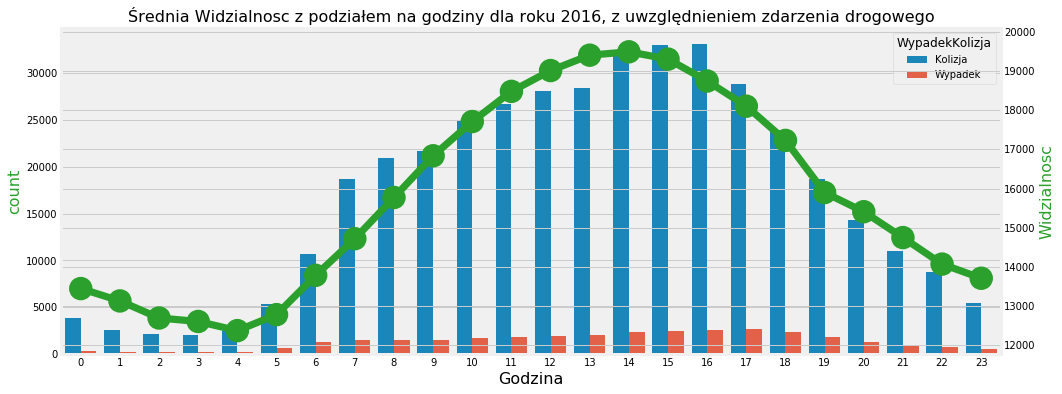

In [152]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [153]:
gWidzialnoscCewik2016=cewik2016.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2016=synop2016.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2016 = gWidzialnoscSynop2016.corr(gWidzialnoscCewik2016)
gWidzialnosc2016

0.9727758307475713

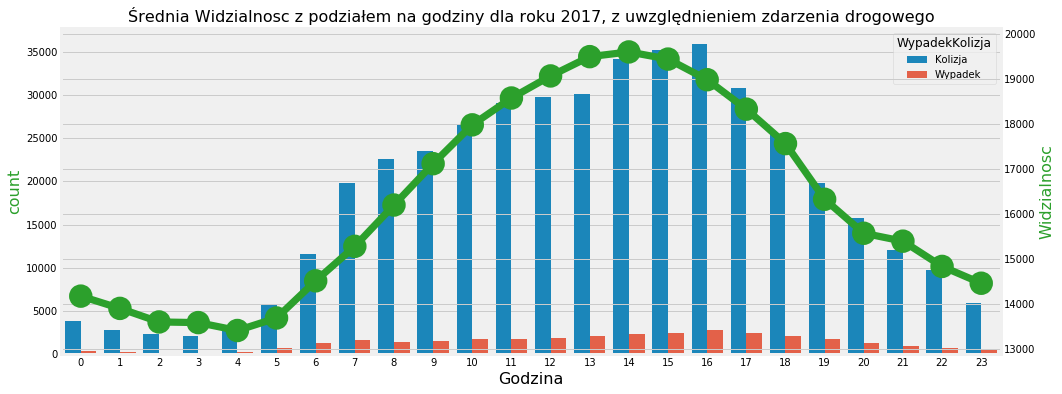

In [154]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [155]:
gWidzialnoscCewik2017=cewik2017.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2017=synop2017.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2017 = gWidzialnoscSynop2017.corr(gWidzialnoscCewik2017)
gWidzialnosc2017

0.9708218973486281

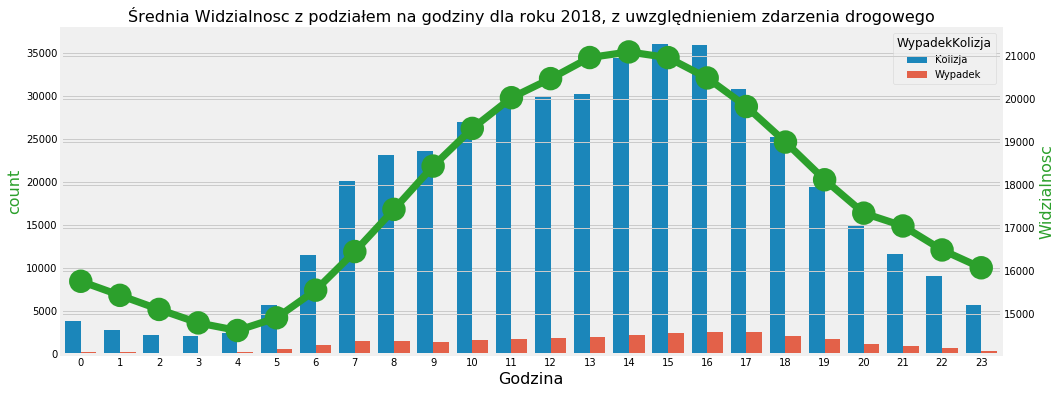

In [156]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [157]:
gWidzialnoscCewik2018=cewik2018.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2018=synop2018.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2018 = gWidzialnoscSynop2018.corr(gWidzialnoscCewik2018)
gWidzialnosc2018

0.9584456386758401

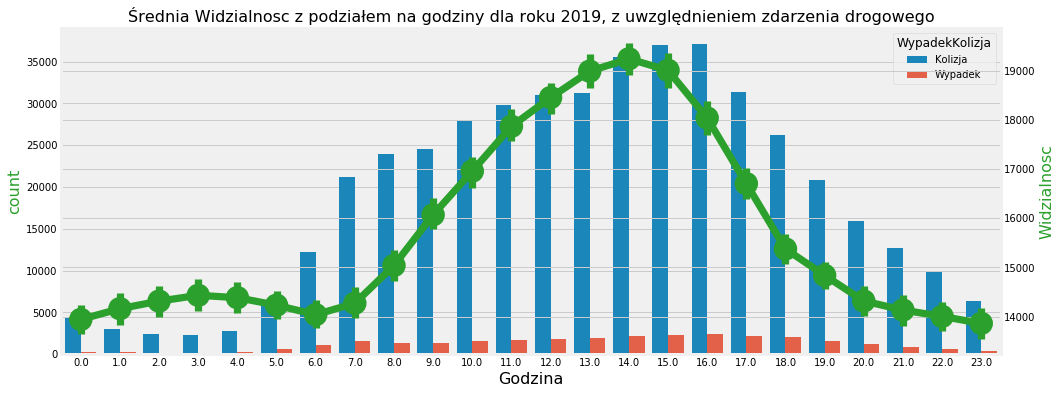

In [158]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na godziny dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Godzina", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Godz', y='Widzialnosc', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [159]:
gWidzialnoscCewik2019=cewik2019.groupby('Godzina')['WypadekKolizja'].count()
gWidzialnoscSynop2019=synop2019.groupby('Godz')['Widzialnosc'].mean()
gWidzialnosc2019 = gWidzialnoscSynop2019.corr(gWidzialnoscCewik2019)
gWidzialnosc2019

0.8672849609052273

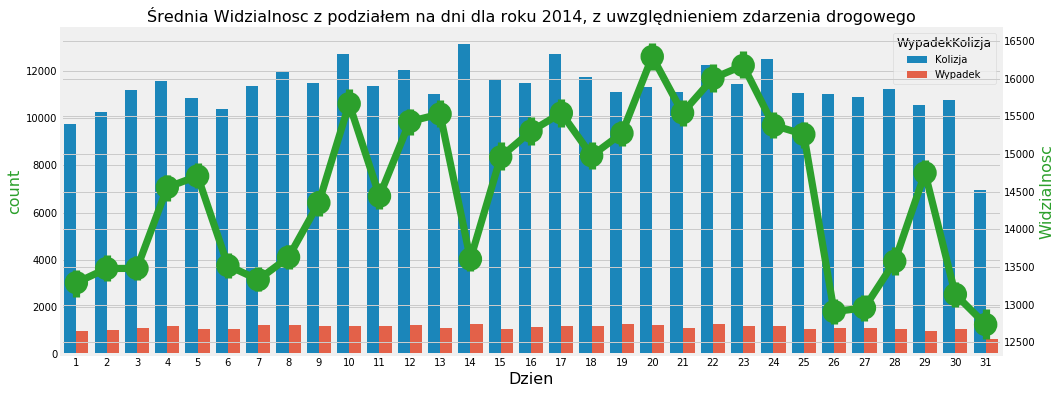

In [161]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2014, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2014)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2014,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [162]:
dWidzialnoscCewik2014=cewik2014.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2014=synop2014.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2014 = dWidzialnoscSynop2014.corr(dWidzialnoscCewik2014)
dWidzialnosc2014

0.48513995973280294

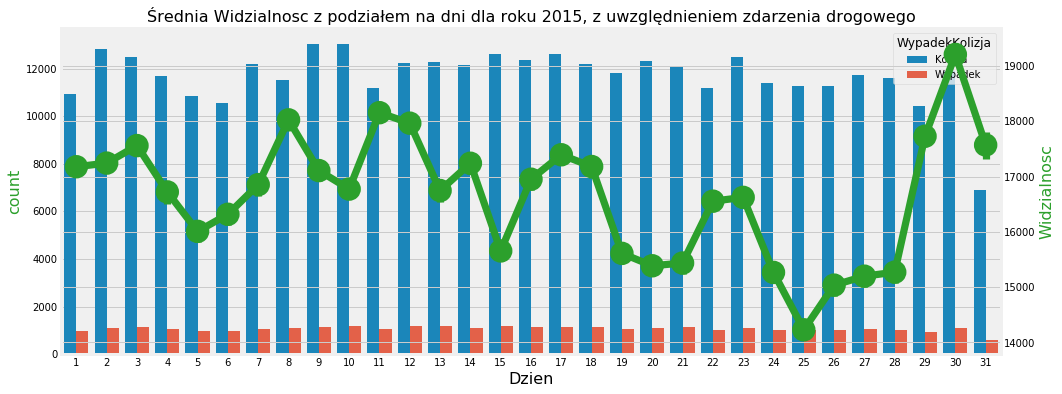

In [163]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2015, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2015)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2015,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [164]:
dWidzialnoscCewik2015=cewik2015.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2015=synop2015.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2015 = dWidzialnoscSynop2015.corr(dWidzialnoscCewik2015)
dWidzialnosc2015

-0.030173893717299415

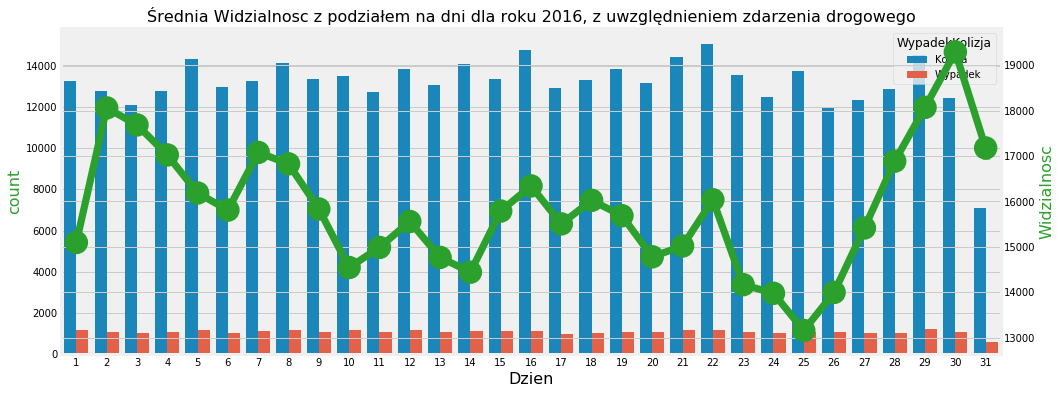

In [165]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2016, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2016)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2016,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [166]:
dWidzialnoscCewik2016=cewik2016.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2016=synop2016.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2016 = dWidzialnoscSynop2016.corr(dWidzialnoscCewik2016)
dWidzialnosc2015

-0.030173893717299415

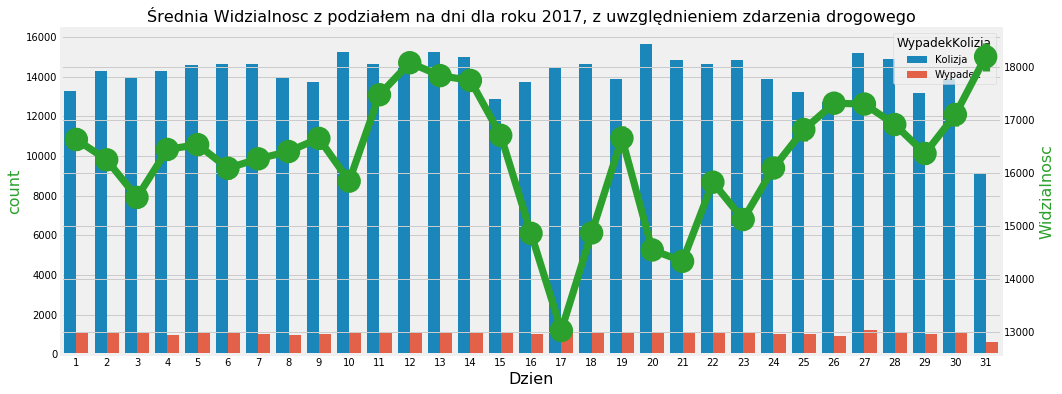

In [167]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2017, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2017)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2017,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [168]:
dWidzialnoscCewik2017=cewik2017.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2017=synop2017.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2017 = dWidzialnoscSynop2017.corr(dWidzialnoscCewik2017)
dWidzialnosc2017

-0.3308502720528437

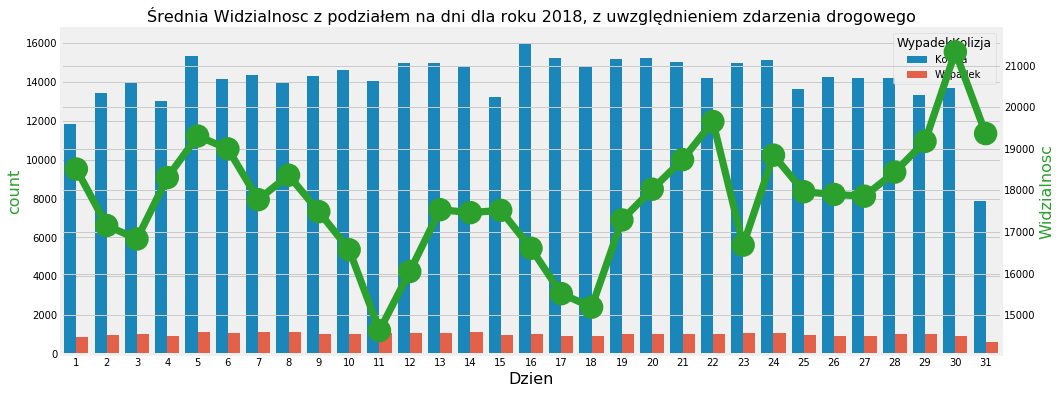

In [169]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2018, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2018)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2018,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [170]:
dWidzialnoscCewik2018=cewik2018.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2018=synop2018.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2018 = dWidzialnoscSynop2018.corr(dWidzialnoscCewik2018)
dWidzialnosc2018

-0.32411658973399415

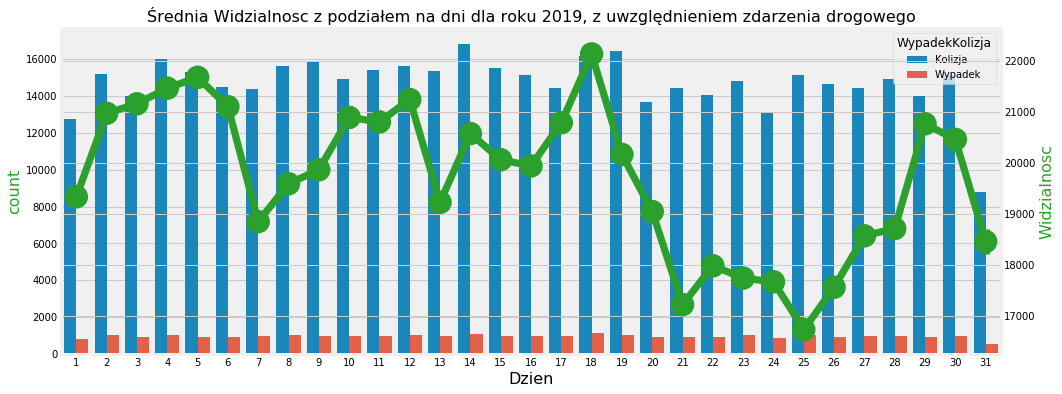

In [171]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na dni dla roku 2019, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Dzien", hue="WypadekKolizja", data=cewik2019)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Dzien', y='Widzialnosc', data = synop2019,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [172]:
dWidzialnoscCewik2019=cewik2019.groupby('Dzien')['WypadekKolizja'].count()
dWidzialnoscSynop2019=synop2019.groupby('Dzien')['Widzialnosc'].mean()
dWidzialnosc2019 = dWidzialnoscSynop2019.corr(dWidzialnoscCewik2019)
dWidzialnosc2019

0.37683475401275457

## ANALIZA DANYCH W SKALI ROCZNEJ !!!!

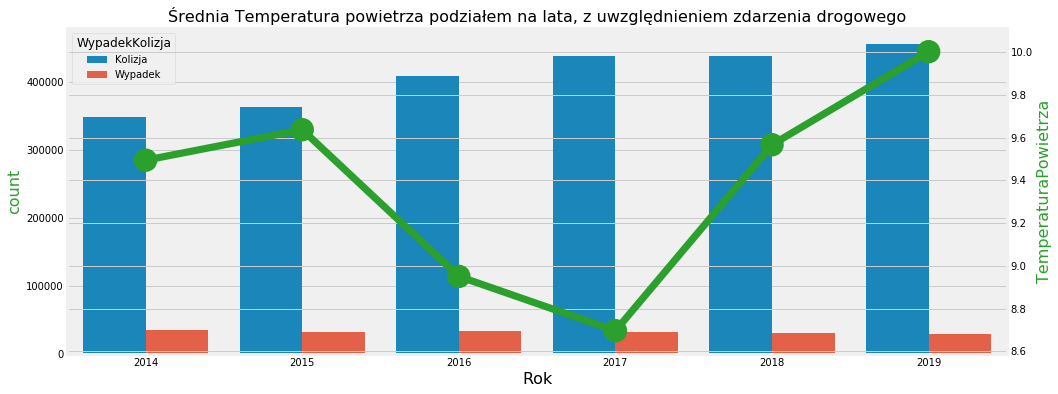

In [43]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Temperatura powietrza podziałem na lata, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Rok", hue="WypadekKolizja", data=df2)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Rok', y='TemperaturaPowietrza', data = df4,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [28]:
rTemperaturaPowietrzaCewik2019=df2.groupby('Rok')['WypadekKolizja'].count()
rTemperaturaPowietrzaSynop2019=df4.groupby('Rok')['TemperaturaPowietrza'].mean()
rTemperaturaPowietrza2019 = rTemperaturaPowietrzaSynop2019.corr(rTemperaturaPowietrzaCewik2019)
rTemperaturaPowietrza2019

-0.04835956218271217

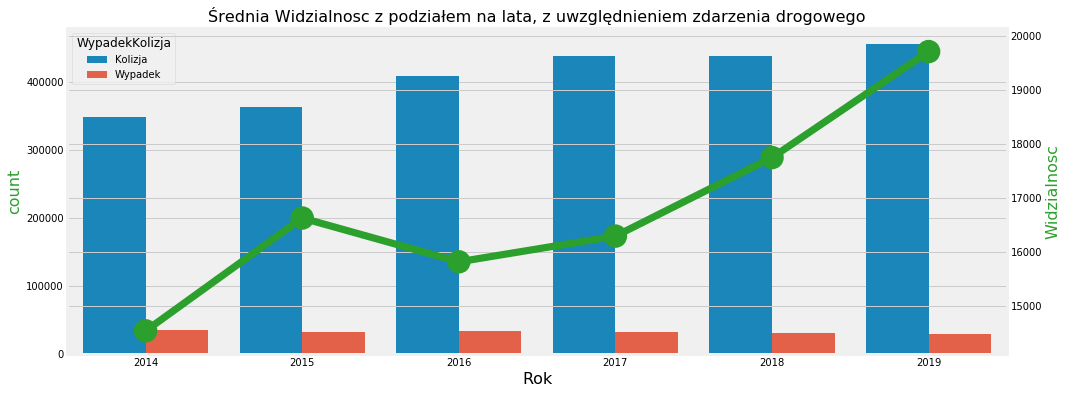

In [41]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia Widzialnosc z podziałem na lata, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Rok", hue="WypadekKolizja", data=df2)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Rok', y='Widzialnosc', data = df4,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [33]:
rWidzialnoscCewik2019=df2.groupby('Rok')['WypadekKolizja'].count()
rWidzialnoscSynop2019=df4.groupby('Rok')['Widzialnosc'].mean()
rWidzialnosc2019 = rWidzialnoscSynop2019.corr(rWidzialnoscCewik2019)
rWidzialnosc2019

0.7451820405784253

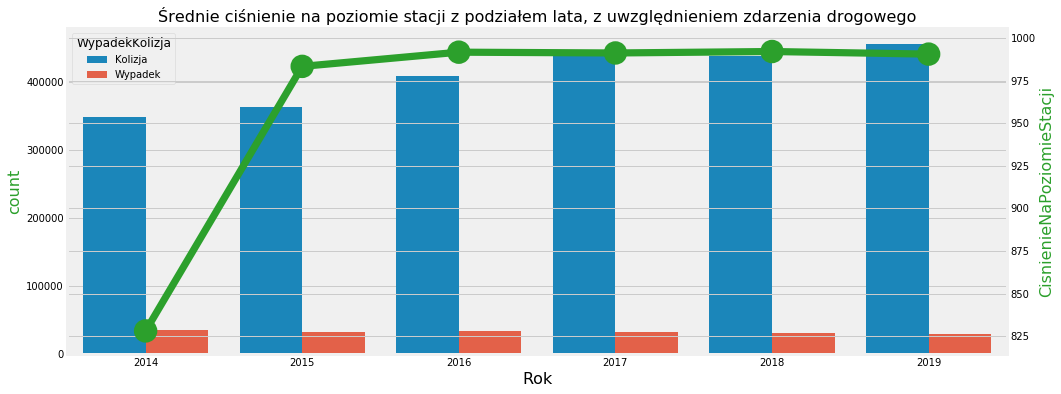

In [42]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnie ciśnienie na poziomie stacji z podziałem lata, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Rok", hue="WypadekKolizja", data=df2)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Rok', y='CisnienieNaPoziomieStacji', data = df4,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [35]:
rStacjaCewik2019=df2.groupby('Rok')['WypadekKolizja'].count()
rStacjaSynop2019=df4.groupby('Rok')['CisnienieNaPoziomieStacji'].mean()
rStacja2019 = rStacjaSynop2019.corr(rStacjaCewik2019)
rStacja2019

0.6934261979567665

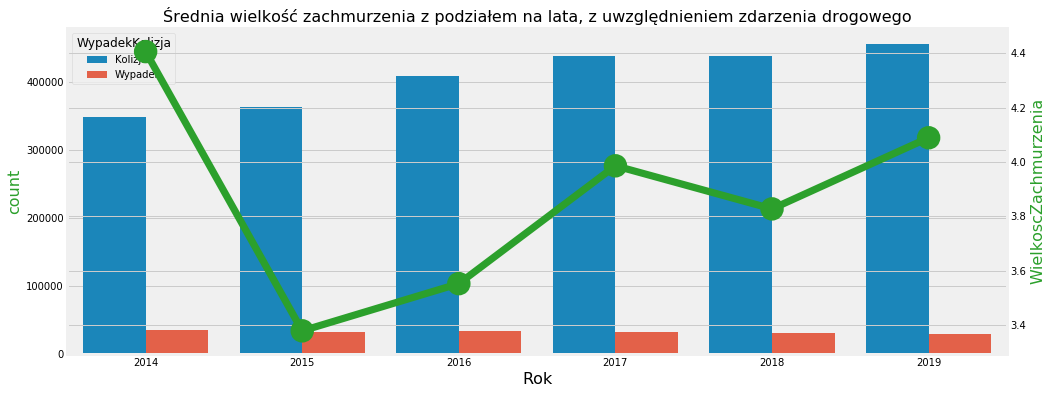

In [44]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia wielkość zachmurzenia z podziałem na lata, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Rok", hue="WypadekKolizja", data=df2)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Rok', y='WielkoscZachmurzenia', data = df4,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [45]:
rWielkoscZachmurzeniaCewik2019=df2.groupby('Rok')['WypadekKolizja'].count()
rWielkoscZachmurzeniaSynop2019=df4.groupby('Rok')['WielkoscZachmurzenia'].mean()
rWielkoscZachmurzenia2019 = rWielkoscZachmurzeniaSynop2019.corr(rWielkoscZachmurzeniaCewik2019)
rWielkoscZachmurzenia2019

0.041815921541063346

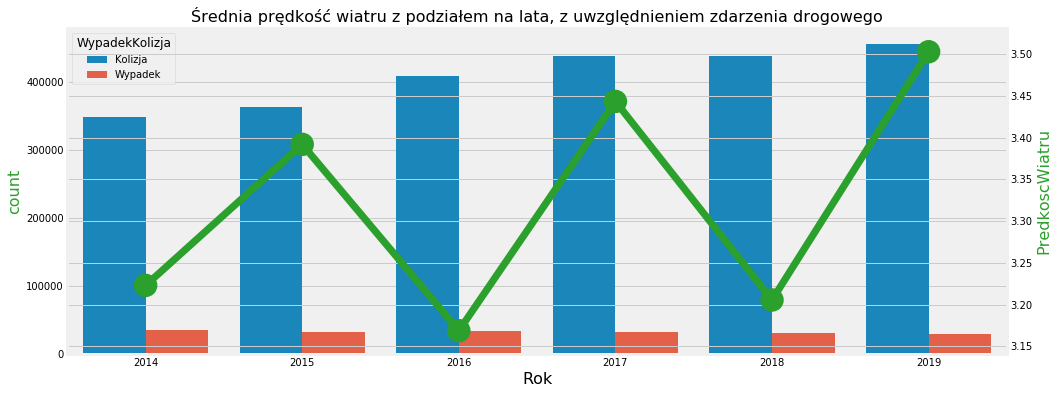

In [46]:
fig, ax1 = plt.subplots(figsize=(15,6))
color = 'tab:green'
ax1.set_title('Średnia prędkość wiatru z podziałem na lata, z uwzględnieniem zdarzenia drogowego', fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Avg Temp', fontsize=16, color=color)
ax2 =sns.countplot(x="Rok", hue="WypadekKolizja", data=df2)
ax1.tick_params(axis='y')


ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Avg Percipitation %', fontsize=16, color=color)
ax2 = sns.pointplot(x='Rok', y='PredkoscWiatru', data = df4,color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

In [47]:
rPredkoscWiatruCewik2019=df2.groupby('Rok')['WypadekKolizja'].count()
rPredkoscWiatruSynop2019=df4.groupby('Rok')['PredkoscWiatru'].mean()
rPredkoscWiatru2019 = rPredkoscWiatruSynop2019.corr(rPredkoscWiatruCewik2019)
rPredkoscWiatru2019

0.36522340213284576